# <font color='#FFD700'>Problem Definition</font>

La salud mental en el ámbito laboral es un tema crítico, especialmente en el sector tecnológico, donde el estrés y la presión pueden afectar significativamente el bienestar de los empleados.

Objetivo: Desarrollar un modelo MachiL para predecir si una persona buscará tratamiento psicológico/psiquiátrico en función de las características personales, laborales y organizacionales de la encuesta.

Analizar y predecir el comportamiento relacionado con la búsqueda de tratamiento en salud mental puede ser útil para las empresas al diseñar políticas y programas de apoyo más efectivos.

El modelo proporcionará insights sobre barreras o facilitadores que:

- Los empleados tienen para búsqueda de ayuda
- Puedan servir de guías para implementar acciones específicas/efectivas para fomentar la salud mental en el lugar de trabajo.


Impacto del Proyecto

• Promover la creación de ambientes laborales inclusivos y conscientes de la salud mental.

• Proveer información clave para el diseño de políticas corporativas en materia de salud mental.

•  Mejorar calidad de vida y el desempeño de los empleados en el sector tecnológico.


# <font color='#FFD700'>Environment preparation</font>

###<font color='#FFD700'>Importing Libraries </font>

In [691]:
import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [692]:
import seaborn as sns

from scipy import stats
from scipy.stats import randint

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import binarize, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [693]:
%matplotlib inline

In [694]:
pd.set_option('display.float_format', lambda x : '%.2f' %x)
pd.set_option('display.max_columns', 500)

Nota: en algunos apartados de repite la importación, únicamente se dejan por motivos de claridad para el alumno, del origen de la librería

# <font color='#FFD700'>Data Access | Collection</font>


In [695]:
!rm -rf ialab
!git clone https://github.com/hacklifeplus/ialab.git


Cloning into 'ialab'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 3), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 2.79 MiB | 4.51 MiB/s, done.
Resolving deltas: 100% (3/3), done.


Este conjunto de datos procede de una encuesta que intenta captar percepciones, actitudes y realidades en materia de la salud mental en el lugares de trabajo tecnológico.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1259 | 27 | 296 KB|


| Id | Features | Description |
| :-- | :--| :--|
|01|**Timestamp**|Hora en que se envió la encuesta.|
|02|**Age**|Edad de la persona.|
|03|**Gender**|Género de la persona.|
|04|**Country**|El nombre del país al que pertenece la persona. País de residencia.|
|05|**state**|El nombre del estado al que pertenece la persona. Estado de residencia.|
|06|**self_employed**|Si la persona es autónoma/autoempleada o no (trabaja como empleado para una empresa).|
|07|**family_history**|Si la historia familiar de la persona tuvo enfermedad mental o no.|
|08|**treatment**|¿Has buscado tratamiento psicológico o psiquiátrico para alguna cuestión de salud mental?|
|09|**work_intefere**|Si tienes alguna cuestión de salud mental, ¿sientes que interfiere en tu trabajo?|
|10|**no_employees**|¿Cuántos empleados tiene tu empresa u organización?|
|11|**remote_work**|¿Trabajas de forma remota (fuera de una oficina) al menos el 50% del tiempo?|
|12|**tech_company**|¿Trabajas en una empresa/organización de tecnología?|
|13|**benifits**|¿Tu empresa proporciona beneficios de salud mental?|
|14|**care_options**|¿Conoces las opciones de atención de salud mental que proporciona tu empresa?|
|15|**wellness_program**|¿Tiene tu empresa programas de salud mental como parte de un programa de bienestar para empleados?|
|16|**seek_help**|¿Tu empresa proporciona recursos para aprender más sobre problemas de salud mental y cómo buscar ayuda?|
|17|**anonymity**|¿Estás protegido mediante anonimato si usas de los recursos para tratamiento de salud mental?|
|18|**leave**|¿Es fácil para ti tomar una baja médica por una condición de salud mental?|
|19|**mental_health_consequence**|¿Crees que comentar un problema de salud mental en tu empresa tendría consecuencias negativas?|
|20|**phy_health_consequence**|¿Crees que comentar un problema de salud física en tu empresa tendría consecuencias negativas?|
|21|**coworkers**|¿Estarías dispuesto a comentar un problema de salud mental con tus compañeros de trabajo?|
|22|**supervisor**|¿Estarías dispuesto a comentar un problema de salud mental con tus supervisores directos?|
|23|**mental_health_interview**|¿Mencionarías un problema de salud mental en una entrevista para acceso a un trabajo?|
|24|**phs_health_interivew**|¿Mencionarías un problema de salud física en una entrevista para acceso a un trabajo?|
|25|**mental_vs_physical**|¿Percibes que tu empresa toma la salud mental tan en serio como la salud física?|
|26|**obs_consequence**|En tu lugar de trabajo ¿Has oído observado consecuencias negativas en empleados por temas de salud mental?|
|27|**comments**|Cualquier nota adicional o comentarios.|

In [696]:
data = pd.read_csv("/content/ialab/IT_mental_health.survey.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [697]:
data.shape

(1259, 27)

- Tenemos un total de **1259** filas & **27** columnas en este dataset.

# <font color='#FFD700'>Exploratory Data Analysis EDA </font>




###<font color='#FFD700'>Datos faltantes </font>

In [698]:
# Método 1. Obtener el número de valores NO nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Hemos encontrado valores faltantes en las siguientes columnas `state`, `self_employed`, `work_interfere` and `comments`.

In [699]:
# Método 2 . Obtener el número de valores nulos
# data.isnull().sum()

In [700]:
# Método 2. Obtener el número de valores nulos
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()
print(missing_data)

                           Total  Percent
comments                    1095     0.87
state                        515     0.41
work_interfere               264     0.21
self_employed                 18     0.01
seek_help                      0     0.00
obs_consequence                0     0.00
mental_vs_physical             0     0.00
phys_health_interview          0     0.00
mental_health_interview        0     0.00
supervisor                     0     0.00
coworkers                      0     0.00
phys_health_consequence        0     0.00
mental_health_consequence      0     0.00
leave                          0     0.00
anonymity                      0     0.00
Timestamp                      0     0.00
wellness_program               0     0.00
Age                            0     0.00
benefits                       0     0.00
tech_company                   0     0.00
remote_work                    0     0.00
no_employees                   0     0.00
treatment                      0  


| Columna (variable) | Númwero de valores faltantes | Proporción | Posible solución
| :-- | :-- | :-- | :-- |
| `state` | 515 | 40.91 %| Eliminar columna |
|`self_employed` | 18 | 1.43 %| Sustituir con la Moda |
| `work_interfere` | 264 | 20.94 %| Sustituir con la Moda |
| `comments` | 1095 | 86.97 %| Eliminar columna |

###<font color='#FFD700'>Características, valores y número  </font>

In [701]:
# La función unique() nos proporciona los valores de literales o valores numéricos (únicos)
data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [702]:
# La función unique() nos proporciona el número los valores literales o valores numéricos (únicos)
data['Gender'].nunique()

49

In [703]:
# Calcula el número de valores únicos por cada columna dado un dataset
import pandas as pd

def unique_values_per_column(dataset):
    unique_counts = dataset.nunique()
    return unique_counts


In [704]:
unique_values_per_column(data)

,0
Timestamp,1246
Age,53
Gender,49
Country,48
state,45
self_employed,2
family_history,2
treatment,2
work_interfere,4
no_employees,6


In [705]:
data['self_employed'].value_counts()

,count
self_employed,
No,1095
Yes,146


In [706]:
data['work_interfere'].value_counts()

,count
work_interfere,
Sometimes,465
Never,213
Rarely,173
Often,144


In [707]:
data['no_employees'].value_counts()

,count
no_employees,
6-25,290
26-100,289
More than 1000,282
100-500,176
1-5,162
500-1000,60


In [708]:
data['tech_company'].value_counts()

,count
tech_company,
Yes,1031
No,228


In [709]:
data['leave'].value_counts()

,count
leave,
Don't know,563
Somewhat easy,266
Very easy,206
Somewhat difficult,126
Very difficult,98


In [710]:
data['Gender'].value_counts()

,count
Gender,
Male,615
male,206
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4


Para facilitar el análisis categorizaremos la característica `Gender` en `Male`,`Female`, and `Trans`.

### <font color='#FFD700'>Valores duplicados</font>

In [711]:
data.duplicated().any()

False

##<font color='#FFD700'>Errores en datos</font>

### <font color='#FFD700'>Valores numéricos</font>

In [712]:
print(data['Age'].describe())

count          1259.00
mean       79428148.31
std      2818299442.98
min           -1726.00
25%              27.00
50%              31.00
75%              36.00
max     99999999999.00
Name: Age, dtype: float64


**Observamos valores inciorrectos en `Age`:**
   - `Max Age` de una persona no puede ser **99999999999.00**.
   - Tampoco una persona puede tener una edad negativa. El valor `min` **-1726**.

Como en términos generales la edad de **18 años** es la legal para trabajar en la fase de limpieza o tratamiento de datos tendremos que manejar estos errores. y también nos pondremos como límite superior la edad de **74 años**.

In [713]:
data[data['Age']<18]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


In [714]:
# Contar las filas donde 'Age' es menor de 18
count_under_18 = data[data['Age'] < 18].shape[0]
# Mostrar el resultado
print(count_under_18)

6


In [715]:
data[data['Age'] > 64]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
560,2014-08-27 19:17:07,65,Male,United States,FL,Yes,No,No,NaN,6-25,Yes,No,No,No,No,No,Don't know,Very easy,Maybe,No,Some of them,No,No,No,Yes,No,NaN
1182,2014-10-02 21:25:16,72,Female,United States,IN,No,Yes,Yes,Never,500-1000,Yes,No,Yes,Not sure,Don't know,Yes,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes,NaN


In [716]:
# Contar las filas donde 'Age' es mayor de 64
count_over_64 = data[data['Age'] > 64].shape[0]
# Mostrar el resultado
print(count_over_64)

4


# <font color='#FFD700'>Data Preparation</font>

##<font color='#FFD700'>Eliminar columnas innecesarias</font>

In [717]:
# Eliminando las columnas 'Timestamp', 'Country','state' y 'comments'
data = data.drop(['Timestamp', 'Country', 'state', 'comments'], axis=1)

# Confirmar que las columnas han sido eliminadas
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

##<font color='#FFD700'>Corrección Datos faltantes </font>


<font color='#FFD700'>self_employed</font>

In [718]:
# Número de filas sin el dato (valor null, np.nan)
data['self_employed'].isnull().sum()

18

In [719]:
# Valores que toma la característica
data['self_employed'].value_counts()

,count
self_employed,
No,1095
Yes,146


In [720]:
# Moda que tiene la característica
data['self_employed'].mode()[0]

'No'

In [721]:
# Sustitución de los valores faltantes np.nan por el valor de la moda de la característica
data['self_employed'] = data['self_employed'].replace(np.nan, data['self_employed'].mode()[0])

In [722]:
# Número de filas sin el dato (valor null, np.nan). Ya debe ser cero
data['self_employed'].isnull().sum()

0

<font color='#FFD700'>work_interfere</font>

In [723]:
data['work_interfere'].isnull().sum()

264

In [724]:
data['work_interfere'].value_counts()

,count
work_interfere,
Sometimes,465
Never,213
Rarely,173
Often,144


In [725]:
data['work_interfere'].mode()[0]

'Sometimes'

In [726]:
# Sustitución de los valores faltantes np.nan por el valor de la moda de la característica
data['work_interfere'] = data['work_interfere'].replace(np.nan, data['work_interfere'].mode()[0])

In [727]:
data['work_interfere'].isnull().sum()

0

<font color='#FFD700'>Verificación de datos faltantes</font>

In [728]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1259 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             1259 non-null   object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

In [729]:
# Método 2. Obtener el número de valores nulos
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()
print(missing_data)

                           Total  Percent
Age                            0     0.00
seek_help                      0     0.00
mental_vs_physical             0     0.00
phys_health_interview          0     0.00
mental_health_interview        0     0.00
supervisor                     0     0.00
coworkers                      0     0.00
phys_health_consequence        0     0.00
mental_health_consequence      0     0.00
leave                          0     0.00
anonymity                      0     0.00
wellness_program               0     0.00
Gender                         0     0.00
care_options                   0     0.00
benefits                       0     0.00
tech_company                   0     0.00
remote_work                    0     0.00
no_employees                   0     0.00
work_interfere                 0     0.00
treatment                      0     0.00
family_history                 0     0.00
self_employed                  0     0.00
obs_consequence                0  

##<font color='#FFD700'>Corrección Errores en datos</font>

<font color='#FFD700'>Age</font>

In [730]:
# Eliminar filas con edades menores de 18 años
data = data[data['Age']>=18]
# Contar las filas donde 'Age' es menor de 18
count_under_18 = data[data['Age'] < 18].shape[0]
# Mostrar el resultado
print(count_under_18)

0


In [731]:
# Eliminar filas con edades mayores de 64 años
data = data[data['Age'] <= 65]
# Contar las filas donde 'Age' es menor de 18
count_over_64 = data[data['Age'] > 65].shape[0]
# Mostrar el resultado
print(count_over_64)

0


In [732]:
data.describe()

,Age
count,1250.00
mean,32.04
std,7.20
min,18.00
25%,27.00
50%,31.00
75%,36.00
max,65.00


## <font color='#FFD700'>Normalización de características</font>

In [733]:
data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [734]:
data['Gender'].nunique()

46

In [735]:
data['Gender'].str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'malr', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [736]:
data['Gender'].str.lower().nunique()

40

In [737]:
data['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61])

In [738]:
data['family_history'].unique()

array(['No', 'Yes'], dtype=object)

In [739]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

In [740]:
unique_gender = data['Gender'].str.lower().unique()

# Stratas of Gender category
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make",
            "male ", "man","msle", "mail", "malr","cis man", "Cis Male",
            "cis male"]
other_str = ["trans-female", "something kinda male?", "queer/she/they",
             "non-binary","nah", "all", "enby", "fluid", "genderqueer",
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^",
             "trans woman", "neuter", "female (trans)", "queer",
             "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ",
              "cis-female/femme", "female (cis)", "femail"]

# Iterate over rows and replace the inconsistent data with right data
for (row, col) in data.iterrows():
    if str.lower(col['Gender']) in male_str:
        data['Gender'].replace(to_replace=col['Gender'], value='male', inplace=True)

    if str.lower(col['Gender']) in female_str:
        data['Gender'].replace(to_replace=col['Gender'], value='female', inplace=True)

    if str.lower(col['Gender']) in other_str:
        data['Gender'].replace(to_replace=col['Gender'], value='other', inplace=True)

# Remove rest of the unnecessary text
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

# Display the unique value of Gender feature
print(data['Gender'].unique())

['female' 'male' 'other']


In [741]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

In [742]:
# DRS
data['self_employed'] = data['self_employed'].replace([defaultString], 'No')
print(data['self_employed'].unique())

['No' 'Yes']


In [743]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1250 non-null   int64 
 1   Gender                     1250 non-null   object
 2   self_employed              1250 non-null   object
 3   family_history             1250 non-null   object
 4   treatment                  1250 non-null   object
 5   work_interfere             1250 non-null   object
 6   no_employees               1250 non-null   object
 7   remote_work                1250 non-null   object
 8   tech_company               1250 non-null   object
 9   benefits                   1250 non-null   object
 10  care_options               1250 non-null   object
 11  wellness_program           1250 non-null   object
 12  seek_help                  1250 non-null   object
 13  anonymity                  1250 non-null   object
 14  leave        

In [744]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## <font color='#FFD700'>Valores duplicados</font>

In [745]:
data.duplicated().any()

True

In [746]:
# Contar el número de filas duplicadas
numero_duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {numero_duplicados}")

Número de filas duplicadas: 4


In [747]:
# Eliminar filas duplicadas
data = data.drop_duplicates()

# Verificar el número de filas después de eliminar duplicados
numero_duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {numero_duplicados}")


Número de filas duplicadas: 0


## <font color='#FFD700'>Almacenamiento datos limpios</font>

Almacenamos en un fichero los datos limpios originales con sus tipos de datos, tanto numéricos como categóricos. Fichero (cat) de categórico

In [748]:
data.to_csv("ialab/IT_mental_health.survey.clean.cat.csv", index=False)

## <font color='#FFD700'>Conversión datos catégoricos en numéricos</font>

Para entrenar cierto modelos de ML se necesita convertir datos categóricos en datos numéricos (la mayoría de los modelos de ML requieren datos numéricos como entrada).

In [749]:
from sklearn import preprocessing
import pandas as pd

# Inicializar el diccionario para almacenar los mapeos de etiquetas
labelDict = {}

# Iterar sobre las columnas categóricas
for feature in data.select_dtypes(include=['object', 'category']).columns:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])

    # Crear el mapeo entre las clases originales y las etiquetas numéricas
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])

    # Almacenar el mapeo en labelDict
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] = labelValue

data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0


In [750]:
# Contar el número de filas duplicadas
numero_duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {numero_duplicados}")

Número de filas duplicadas: 0


## <font color='#FFD700'>Almacenamiento datos numéricos</font>

In [751]:
data.to_csv("ialab/IT_mental_health.survey.clean.work.csv", index=False)

In [752]:
data = pd.read_csv("ialab/IT_mental_health.survey.clean.work.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1246 non-null   int64
 1   Gender                     1246 non-null   int64
 2   self_employed              1246 non-null   int64
 3   family_history             1246 non-null   int64
 4   treatment                  1246 non-null   int64
 5   work_interfere             1246 non-null   int64
 6   no_employees               1246 non-null   int64
 7   remote_work                1246 non-null   int64
 8   tech_company               1246 non-null   int64
 9   benefits                   1246 non-null   int64
 10  care_options               1246 non-null   int64
 11  wellness_program           1246 non-null   int64
 12  seek_help                  1246 non-null   int64
 13  anonymity                  1246 non-null   int64
 14  leave                   

# <font color='#FFD700'>Selección de características</font>

## <font color='#FFD700'>Matrices de Correlación</font>

Las **matrices de correlación** se utilizan comúnmente durante la fase de **Análisis Exploratorio de Datos (EDA)** del ciclo de vida de un proyecto de Machine Learning. En esta etapa, se analizan las relaciones entre las variables para comprender mejor el conjunto de datos y su estructura. Aquí es donde las matrices de correlación son más útiles, ya que permiten:

1. **Identificar Relaciones Lineales**: Ayudan a detectar relaciones lineales entre variables, lo cual es importante para seleccionar características relevantes.
2. **Detectar Multicolinealidad**: Pueden revelar si dos o más variables están altamente correlacionadas, lo que podría ser problemático en modelos sensibles a la multicolinealidad, como la regresión lineal.
3. **Informar la Selección de Características**: Conociendo la correlación, puedes eliminar características redundantes (altamente correlacionadas) que no añaden valor al modelo.

Aunque las matrices de correlación son particularmente importantes durante el EDA, también pueden ser útiles en las fases de **ingeniería de características** y **limpieza de datos**:

- **Ingeniería de características**: Las correlaciones pueden guiar la creación de nuevas variables, combinaciones de características o transformaciones (por ejemplo, eliminar variables que están muy correlacionadas entre sí).
- **Limpieza de datos**: En esta etapa, si se detectan correlaciones inesperadas, pueden señalar problemas en los datos, como errores de codificación o valores atípicos.

En resumen, las matrices de correlación se emplean principalmente durante el **EDA**, pero también pueden proporcionar información valiosa en la **ingeniería de características** y **limpieza de datos**.

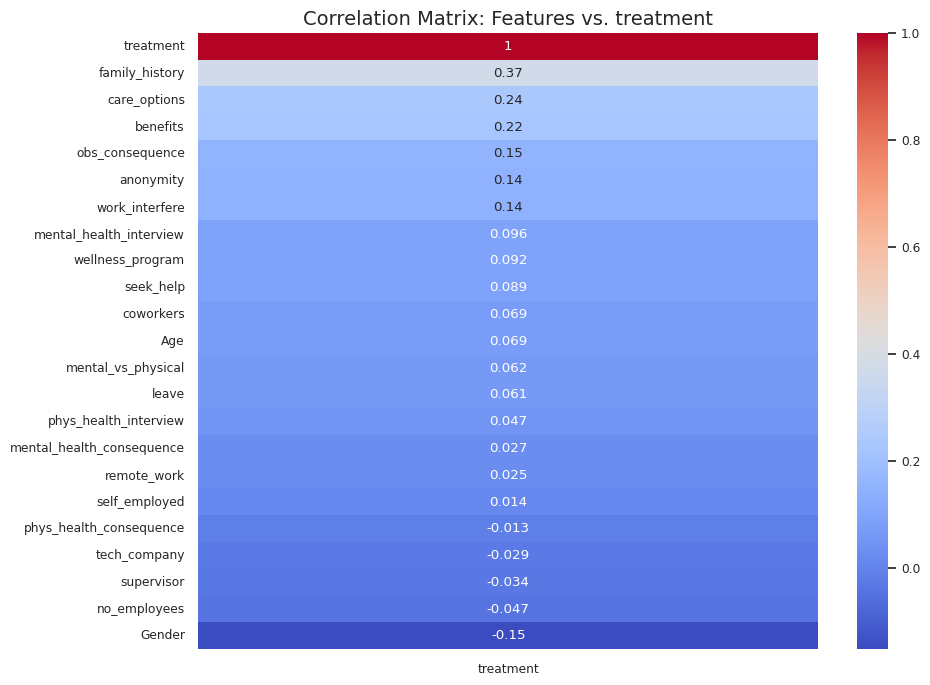

In [753]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Focus on correlations with the 'treatment' feature
churn_correlation = correlation_matrix[['treatment']].sort_values(by='treatment', ascending=False)

# Plot the correlation heatmap for Churn
plt.figure(figsize=(10, 8))
sns.heatmap(churn_correlation, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Features vs. treatment', fontsize=14)
# plt.xlabel('Churn', fontsize=12)
# plt.ylabel('Features', fontsize=12)
plt.show()

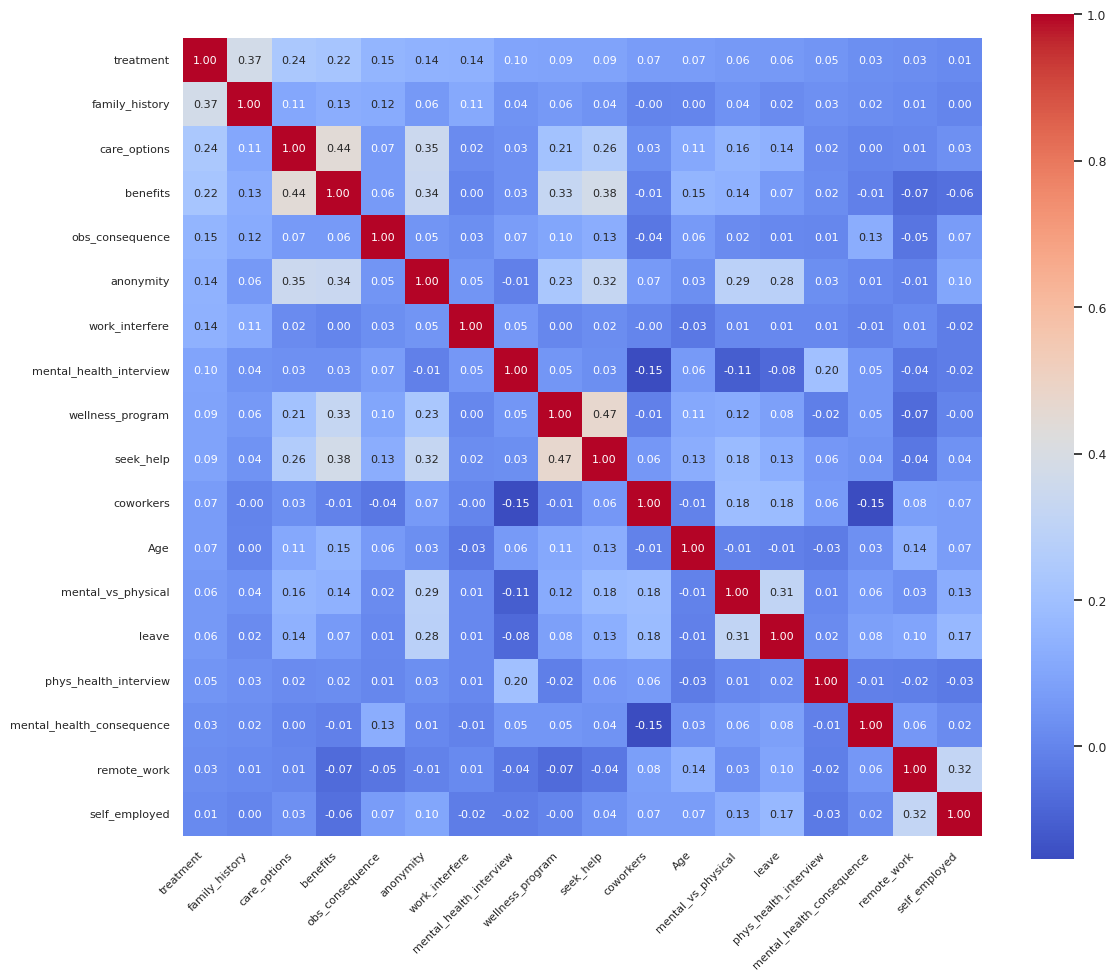

In [754]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que 'data' sea un DataFrame con valores numéricos
corrmat = data.corr()  # Calcula la matriz de correlación

# Número de variables para el heatmap
k = 18
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(data[cols].values.T)

# Ajustes para mejorar la visibilidad
plt.figure(figsize=(12, 10))  # Aumenta el tamaño de la figura
sns.set(font_scale=0.8)  # Disminuye la escala de fuente general
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8},
                 cmap='coolwarm', yticklabels=cols.values, xticklabels=cols.values)  # Ajusta el tamaño de anotaciones
plt.xticks(rotation=45, ha='right', fontsize=8)  # Disminuye el tamaño de letra en las etiquetas del eje X
plt.yticks(fontsize=8)  # Disminuye el tamaño de letra en las etiquetas del eje Y
plt.tight_layout()  # Ajusta el layout para evitar solapamientos
plt.show()


## <font color='#FFD700'>ExtraTreesClassifier</font>

Para determinar la importancia de las características, podemos utilizar a su vez ML: un modelo de clasificación. (ej. `ExtraTreesClassifier`)

In [755]:
# define X and y
# feature_cols = ['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees',
#                 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
#                 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers',
#                 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence' ]

# feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
# feature_cols = ['Gender', 'family_history', 'work_interfere', 'benefits', 'care_options', 'anonymity', 'leave']
# feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', 'obs_consequence', 'mental_health_interview', 'wellness_program', 'seek_help']
# feature_cols = ['family_history', 'benefits', 'care_options', 'anonymity', 'work_interfere', 'obs_consequence', 'mental_health_interview', 'wellness_program', 'seek_help']

feature_cols = ['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees',
                 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
                 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers',
                 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence' ]


X = data[feature_cols]
y = data.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [756]:
# Importar librerías necesarias
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
data_cat = pd.read_csv("ialab/IT_mental_health.survey.clean.cat.csv")

# Convertir características categóricas a numéricas usando LabelEncoder
label_encoder = LabelEncoder()
data_encoded = data_cat.copy()

for col in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# Separar características (X) y variable objetivo (y)
X = data_encoded.drop(columns=['treatment'])  # Excluir la variable objetivo
y = data_encoded['treatment']

# Entrenar un modelo ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X, y)

# Obtener la importancia de las características
feature_importances = extra_trees.feature_importances_

# Crear un DataFrame con las características y sus importancias
extra_trees_results = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Importancia de las características:")
print(extra_trees_results)

Importancia de las características:
                      Feature  Importance
3              family_history        0.11
4              work_interfere        0.09
0                         Age        0.07
9                care_options        0.06
5                no_employees        0.06
13                      leave        0.05
8                    benefits        0.05
16                  coworkers        0.04
17                 supervisor        0.04
19      phys_health_interview        0.04
14  mental_health_consequence        0.04
20         mental_vs_physical        0.04
11                  seek_help        0.04
10           wellness_program        0.03
1                      Gender        0.03
6                 remote_work        0.03
12                  anonymity        0.03
15    phys_health_consequence        0.03
7                tech_company        0.03
18    mental_health_interview        0.02
21            obs_consequence        0.02
2               self_employed        0.0

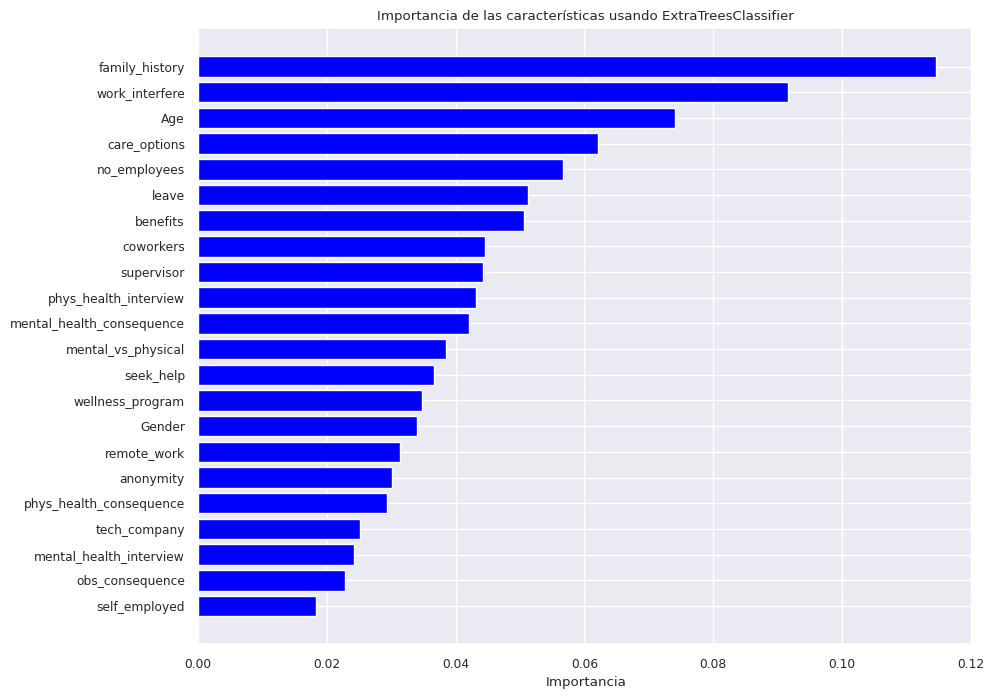

In [757]:
# Visualización de las importancias de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(extra_trees_results['Feature'], extra_trees_results['Importance'], color='blue')
plt.xlabel('Importancia')
plt.title('Importancia de las características usando ExtraTreesClassifier')
plt.gca().invert_yaxis()
plt.show()


## <font color='#FFD700'>ANOVA F-Scores</font>

El puntaje F de ANOVA es una medida de la relación entre las características y la variable objetivo. </br> </br>
Un puntaje F más alto indica una mayor relación, lo que significa que la característica es más relevante para predecir la variable objetivo. </br>

**Obtención (visualización) de las características más importantes**:
- La gráfica muestra las 15 características con los puntajes F más altos. Estas son las características que más probablemente tengan un impacto significativo en la predicción de la variable objetivo (`treatment` en este caso).

**Interpretación práctica**:
- **Altos puntajes F**: Características con altos puntajes F son muy relevantes y deberían considerarse para incluir en el modelo. Estas características tienen una fuerte relación estadística con la variable objetivo.
- **Bajos puntajes F**: Aunque no se muestran en la gráfica, las características con puntajes F bajos tienen una relación más débil con la variable objetivo y podrían ser menos importantes para el modelo.

**Uso en la construcción del modelo**:
- **Reducción de dimensionalidad**: Seleccionar solo las características más importantes puede ayudar a reducir la dimensionalidad del conjunto de datos, lo que puede mejorar el rendimiento del modelo y reducir el tiempo de entrenamiento.
- **Evitar sobreajuste**: Incluir solo las características más relevantes puede ayudar a evitar el sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a los datos nuevos.

Ejemplo concreto:
- Supongamos que una de las características más importantes es `work_interfere`, con un alto puntaje F. Esto sugiere que la interferencia del trabajo con la salud mental tiene una fuerte relación con la variable objetivo `treatment`. Por lo tanto, esta característica debe ser cuidadosamente considerada en el modelo de predicción, ya que proporciona información valiosa sobre la probabilidad de que una persona reciba tratamiento para problemas de salud mental.

Siguiente paso:
- Con esta información, puedes proceder a construir y evaluar tu modelo de aprendizaje automático utilizando las características seleccionadas. Aquí hay un ejemplo de cómo puedes ajustar tu pipeline con las características seleccionadas:

En resumen, los puntajes F de ANOVA te ayudan a identificar las características más relevantes para tu modelo, lo que mejora la eficiencia y la efectividad de tus predicciones.

In [758]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

# Cargar el archivo CSV
data  = pd.read_csv("ialab/IT_mental_health.survey.clean.work.csv")

# Separar características y etiqueta
X = data.drop('treatment', axis=1)  # Suponiendo que 'treatment' es la variable objetivo
y = data['treatment']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular los puntajes ANOVA
f_scores, p_values = f_classif(X_scaled, y)

# Crear un DataFrame con los resultados ordenados por F-Score
feature_names = X.columns
anova_results = pd.DataFrame({
    'Feature': feature_names,
    'F-Score': f_scores,
    'P-Value': p_values
})
anova_results = anova_results.sort_values(by='F-Score', ascending=False)

# Mostrar la tabla con los resultados
print(anova_results)

                      Feature  F-Score  P-Value
3              family_history   202.37     0.00
9                care_options    74.16     0.00
8                    benefits    65.96     0.00
21            obs_consequence    30.20     0.00
1                      Gender    29.28     0.00
12                  anonymity    26.09     0.00
4              work_interfere    25.24     0.00
18    mental_health_interview    11.45     0.00
10           wellness_program    10.56     0.00
11                  seek_help    10.03     0.00
16                  coworkers     5.97     0.01
0                         Age     5.94     0.01
20         mental_vs_physical     4.78     0.03
13                      leave     4.61     0.03
5                no_employees     2.80     0.09
19      phys_health_interview     2.76     0.10
17                 supervisor     1.48     0.22
7                tech_company     1.04     0.31
14  mental_health_consequence     0.91     0.34
6                 remote_work     0.80  

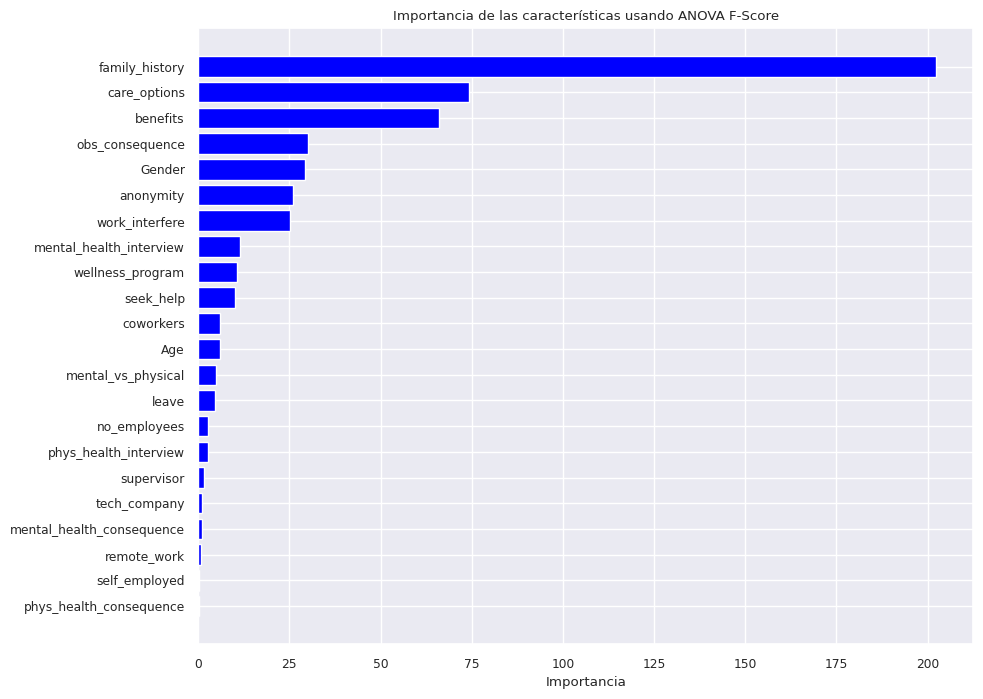

In [759]:
# Visualización de las importancias de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(anova_results['Feature'], anova_results['F-Score'], color='blue')
plt.xlabel('Importancia')
plt.title('Importancia de las características usando ANOVA F-Score')
plt.gca().invert_yaxis()
plt.show()

## <font color='#FFD700'>Chi-cuadrado</font>



Este valor indica la fuerza de la asociación entre cada característica y la variable objetivo. Un valor más alto sugiere una mayor relevancia o dependencia entre la característica y la variable objetivo.

El objetivo principal de este código es identificar qué características categóricas están más asociadas con la variable de predicción `treatment` usando la prueba de Chi-cuadrado. Esto puede ser útil en análisis de datos, ya que permite reducir la dimensionalidad seleccionando solo las variables relevantes, lo cual puede mejorar la interpretación del modelo y su rendimiento

In [760]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo CSV
data = pd.read_csv("ialab/IT_mental_health.survey.clean.cat.csv")

# Seleccionar las columnas categóricas. En teoría todas
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)


# Imputar valores faltantes y codificar las variables categóricas
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = data[column].astype(str)  # Convertir a string para evitar problemas con NaNs
    data[column] = label_encoders[column].fit_transform(data[column])

# Seleccionar las características y la variable de predicción
X = data[categorical_columns].drop(columns=['treatment'], errors='ignore')
y = data['treatment']

# Prueba de Chi-cuadrado entre cada una de las características categóricas en X y la variable de predicción y.
# chi2_scores: Las puntuaciones Chi-cuadrado para cada característica.
# p_values: Los valores p correspondientes que indican la significancia estadística.
chi2_scores, p_values = chi2(X, y)

# Crear un DataFrame con los resultados
# Nombre de cada característica categórica, su puntuación Chi-cuadrado y su valor p.
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
})

# Filtrar las características con un p-valor menor a 0.05 (nivel de significancia típico)
# Esto indica que estas características tienen una asociación estadísticamente significativa con la variable 'treatment'.
# significant_features = chi2_results[chi2_results['P-Value'] < 0.05]
chi2_results = chi2_results[chi2_results['P-Value'] < 0.1]

# Ordenar de mayor a menor importancia basada en la puntuación de Chi-cuadrado
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Mostrar las características significativas
print(chi2_results)


Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')
               Feature  Chi2 Score  P-Value
2       family_history      106.34     0.00
8         care_options       55.13     0.00
7             benefits       41.90     0.00
11           anonymity       32.66     0.00
20     obs_consequence       25.29     0.00
3       work_interfere       15.73     0.00
12               leave        7.44     0.01
0               Gender        6.26     0.01
10           seek_help        5.28     0.02
19  mental_vs_physical        4.08     0.04
9     wellness_program        3.35     0.07
4         no_emplo

**Chi2 Score.** En este caso, la característica `treatment` tiene el valor más alto (622), indicando una asociación muy fuerte con la variable objetivo, seguida por `family_history` (108) y `care_options` (54). </br> </br>






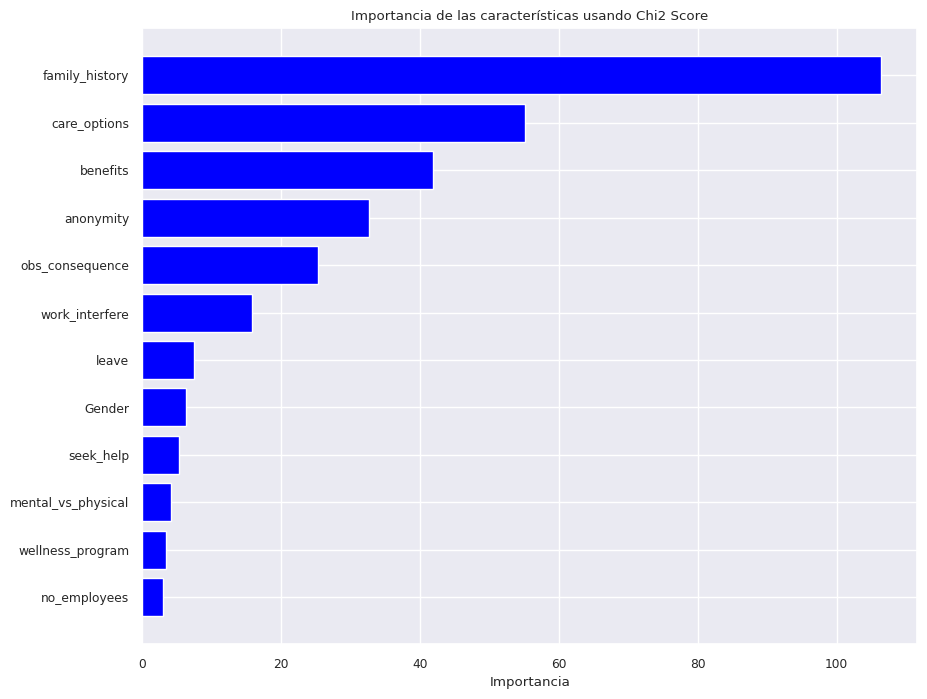

In [761]:
# Visualización de las importancias de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(chi2_results['Feature'], chi2_results['Chi2 Score'], color='blue')
plt.xlabel('Importancia')
plt.title('Importancia de las características usando Chi2 Score')
plt.gca().invert_yaxis()
plt.show()

## <font color='#FFD700'>Mutual Information Score</font>

In [762]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo CSV
data = pd.read_csv("ialab/IT_mental_health.survey.clean.cat.csv")

# Seleccionar las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)


# Imputar valores faltantes y codificar las variables categóricas
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = data[column].astype(str)  # Convertir a string para evitar problemas con NaNs
    data[column] = label_encoders[column].fit_transform(data[column])

# Seleccionar las características y la variable de predicción
X = data[categorical_columns].drop(columns=['treatment'], errors='ignore')
y = data['treatment']

# Calcular la Información Mutua
mutual_info_scores = mutual_info_classif(X, y, discrete_features=True)

# Crear un DataFrame con los resultados
mutual_info_results = pd.DataFrame({
    'Feature':  X.columns,
    'Mutual Info Score': mutual_info_scores
})

# Ordenar de mayor a menor importancia basada en la puntuación de Información Mutua
mutual_info_results = mutual_info_results.sort_values(by='Mutual Info Score', ascending=False)

# Mostrar las características ordenadas por Información Mutua
print(mutual_info_results)


Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')
                      Feature  Mutual Info Score
3              work_interfere               0.09
2              family_history               0.07
8                care_options               0.04
7                    benefits               0.03
0                      Gender               0.02
12                      leave               0.01
20            obs_consequence               0.01
11                  anonymity               0.01
13  mental_health_consequence               0.01
19         mental_vs_physical               0.01
17    m

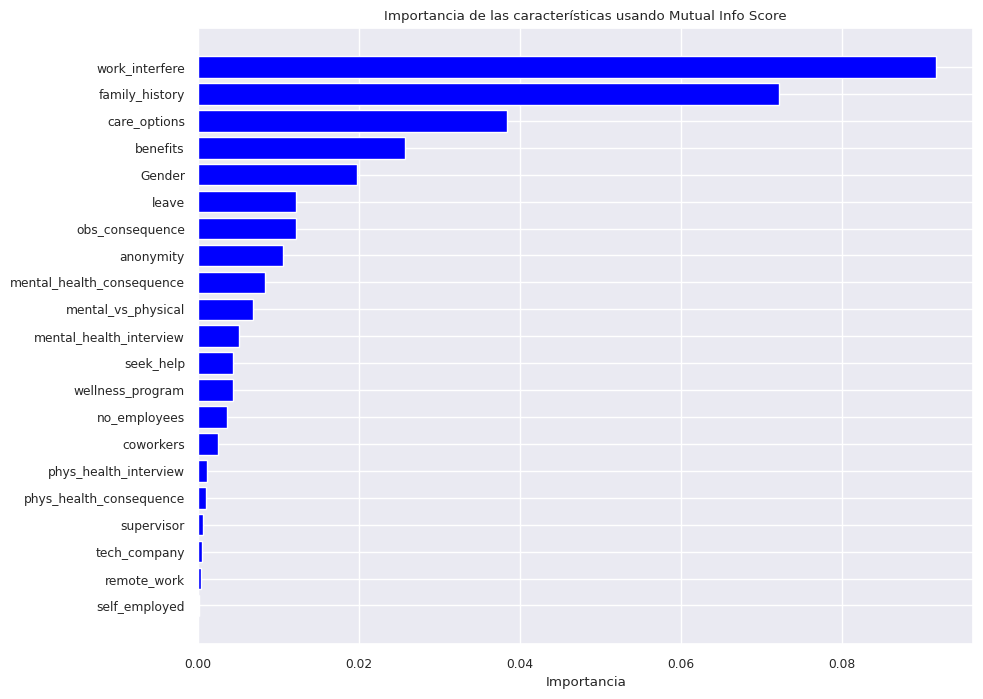

In [763]:
# Visualización de las importancias de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(mutual_info_results['Feature'], mutual_info_results['Mutual Info Score'], color='blue')
plt.xlabel('Importancia')
plt.title('Importancia de las características usando Mutual Info Score')
plt.gca().invert_yaxis()
plt.show()

## <font color='#FFD700'>Análisis para selección de caracterísiticas</font>

Los resultados de los diferentes métodos de selección de características ofrecen diferentes perspectivas sobre la importancia de las variables para el modelo de aprendizaje automático. A continuación, se analizan las similitudes, diferencias y posibles conclusiones de cada método:

---

### **1. Extra Trees Classifier**
- **Naturaleza del método:** Este algoritmo mide la importancia de las características basándose en la reducción del criterio de división (como la Gini o la entropía) a través de los árboles.
- **Principales características:**
  - `family_history` (0.11)
  - `work_interfere` (0.09)
  - `Age` (0.07)
  - `care_options`, `no_employees` (0.06)

**Comentario:**
- Este método destaca la interacción de las características con el objetivo durante las particiones.
- Variables como `family_history` y `work_interfere` son consistentemente relevantes, lo cual es coherente con su presencia en otros métodos.

---

### **2. Anova F-Scores**
- **Naturaleza del método:** Evalúa la correlación entre las características independientes y la variable objetivo mediante la relación de varianza.
- **Principales características (basadas en F-Score):**
  - `family_history` (202.37)
  - `care_options` (74.16)
  - `benefits` (65.96)
  - `obs_consequence` (30.20)
  - `Gender` (29.28)

**Comentario:**
- `family_history`, `care_options` y `benefits` dominan aquí, indicando fuerte asociación con la variable objetivo.
- La significancia de características como `Gender` y `anonymity` también es alta, lo cual no es tan marcado en otros métodos.

---

### **3. Chi Cuadrado**
- **Naturaleza del método:** Mide la independencia entre una característica categórica y la variable objetivo.
- **Principales características (basadas en Chi2 Score):**
  - `family_history` (106.34)
  - `care_options` (55.13)
  - `benefits` (41.90)
  - `anonymity` (32.66)
  - `obs_consequence` (25.29)

**Comentario:**
- Este método refuerza la importancia de características categóricas (`family_history`, `care_options`, `benefits`) similares a las identificadas por ANOVA.
- Aunque algunas variables con baja relación en otros métodos, como `anonymity`, son más significativas aquí, debido a su naturaleza categórica.

---

### **4. Mutual Information Score**
- **Naturaleza del método:** Mide la dependencia no lineal entre las características y la variable objetivo.
- **Principales características:**
  - `work_interfere` (0.09)
  - `family_history` (0.07)
  - `care_options` (0.04)
  - `benefits` (0.03)
  - `Gender` (0.02)

**Comentario:**
- Este método destaca relaciones más sutiles o no lineales. Las características `work_interfere` y `family_history` vuelven a ser relevantes.
- Características como `benefits` y `care_options` tienen una dependencia más moderada.

---

### **Análisis Comparativo**
1. **Consistencia entre métodos:**
   - `family_history`: Consistentemente alta en todos los métodos.
   - `work_interfere`, `care_options` y `benefits`: Altamente relevantes en la mayoría.
   - `obs_consequence`: Moderadamente importante según Chi Cuadrado y ANOVA.

2. **Diferencias notables:**
   - Métodos como Extra Trees y Mutual Information consideran interacciones no lineales, lo que puede darles una ventaja en conjuntos de datos más complejos.
   - ANOVA y Chi Cuadrado tienden a destacar variables categóricas más claramente.

3. **Características con baja relevancia general:**
   - Variables como `self_employed`, `tech_company` y `remote_work` tienen puntuaciones bajas en casi todos los métodos, indicando que su impacto puede ser marginal.

---

### **Recomendación Final**
- Priorizar las características seleccionadas por múltiples métodos: `family_history`, `work_interfere`, `care_options`, `benefits`.
- Realizar una validación cruzada con diferentes subconjuntos de características para comprobar su impacto en el rendimiento del modelo.
- Considerar eliminar o fusionar características de baja relevancia (`self_employed`, `remote_work`) para reducir la dimensionalidad del modelo.


## <font color='#FFD700'>Caracterísiticas seleccionadas</font>

In [764]:
# feature_cols = ['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees',
#                 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
#                 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers',
#                 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence' ]

feature_cols = ['family_history', 'care_options', 'benefits', 'anonymity', 'obs_consequence', 'work_interfere', 'leave', 'Gender']

# ExtraTreesClassifier = ['family_history', 'work_interfere', 'Age', 'care_options', 'no_employees', 'leave', 'benefits','coworkers']
# ANOVA = ['family_history', 'care_options', 'benefits', 'obs_consequence', 'Gender', 'anonymity', 'work_interfere', 'mental_health_interview']
# Chi2 = ['family_history', 'care_options', 'benefits', 'anonymity', 'obs_consequence', 'work_interfere', 'leave', 'Gender']
# Mutual_info = ['work_interfere','family_history', 'care_options', 'benefits', 'Gender', 'leave', 'obs_consequence','anonymity']

# <font color='#FFD700'>Data Trainning Preparation</font>



Este fragmento de código está preparando los datos para entrenar y probar un modelo de Machine Learning.

## <font color='#FFD700'>Definición de `X` (características) | `y` (variable objetivo):</font>

In [765]:
# define X and y

X = data[feature_cols]
y = data.treatment

- **`feature_cols`**: Es una lista que contiene los nombres de las columnas que se van a utilizar como **características** (también llamadas "features") para entrenar el modelo. Estas columnas son las que el modelo utilizará para intentar predecir el objetivo. Esta lista se obtuvo del preoceso de "Selección de características"
  - `family_history`: Antecedentes familiares de problemas de salud mental.
  - `care_options`: Opciones de cuidado disponibles.
  - `benefits`: Si la persona tiene beneficios en su trabajo (como cobertura de salud mental).
  - `anonymity`: Si la persona cree que su información de salud mental se mantendrá anónima.
  - `obs_consequence`: Se ha obsrervado consecuencias negativas en el trabajo por temas de salud mental
  - `work_interfere`: Qué tanto interfieren los problemas de salud mental con el trabajo.
  - `leave`: Facilidad para tomar una baja en el trabajo por problemas de salud mental.
  - `Gender`: Género.

- **`X`**: Es el conjunto de datos que contiene únicamente las características definidas en `feature_cols`. Estas características son las variables que el modelo utilizará para hacer predicciones.
- **`y`**: Es la columna de la variable objetivo, en este caso, `treatment`. Esta columna contiene los valores que se desean predecir. La variable `treatment` podría ser binaria, indicando si la persona ha recibido tratamiento por problemas de salud mental (1) o no (0).

## <font color='#FFD700'>División de los datos en conjuntos de entrenamiento y prueba</font>



In [766]:
# split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  #original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)  #original

In [767]:
print(f"Número de registros en X_train: {len(X_train)}")
print(f"Número de registros en X_test: {len(X_test)}")
print(f"Número de registros en y_train: {len(y_train)}")
print(f"Número de registros en y_test: {len(y_test)}")


Número de registros en X_train: 872
Número de registros en X_test: 374
Número de registros en y_train: 872
Número de registros en y_test: 374


- **`train_test_split`**: Esta función divide los datos en dos partes:
  - **Conjunto de entrenamiento** (`X_train`, `y_train`): El conjunto de datos que el modelo utilizará para aprender los patrones.
  - **Conjunto de prueba** (`X_test`, `y_test`): El conjunto de datos que se utilizará para evaluar el rendimiento del modelo una vez que haya sido entrenado.
  
- **`test_size=0.30`**: Este argumento indica que el 30% de los datos se destinarán al conjunto de prueba, mientras que el 70% se utilizará para el entrenamiento.
  
- **`random_state`**: Se utiliza para controlar la aleatoriedad en la división de los datos. La opción habitual es `random_state=42` (o cualquier número), lo que permite reproducir la misma división en futuras ejecuciones.

## Observaciones
- **`X` y `y`**: Separar las características (`X`) de la variable objetivo (`y`) es esencial para entrenar un modelo supervisado de Machine Learning, ya que el modelo aprenderá a predecir `y` en función de los valores en `X`.
  
- **División en entrenamiento y prueba**: Dividir los datos en entrenamiento y prueba es fundamental para evaluar correctamente el rendimiento del modelo. Se entrena el modelo con el conjunto de entrenamiento y luego se evalúa con el conjunto de prueba para verificar qué tan bien generaliza el modelo a datos no vistos (es decir, si puede hacer buenas predicciones en datos nuevos).

Este paso es clave para evitar problemas como el **sobreajuste** (cuando un modelo se ajusta demasiado a los datos de entrenamiento y no funciona bien en datos nuevos).

In [768]:
X.head()

,family_history,care_options,benefits,anonymity,obs_consequence,work_interfere,leave,Gender
0,0,1,2,2,0,1,2,0
1,0,0,0,0,0,2,0,1
2,0,0,1,0,0,2,1,1
3,1,2,1,1,1,1,1,1
4,0,0,2,0,0,0,0,1


# <font color='#FFD700'>Función de evaluación</font>

In [769]:
def evalClassModel(model, y_test, y_pred_class, plot=False):

    confusion = metrics.confusion_matrix(y_test, y_pred_class)

    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('Recall:', metrics.recall_score(y_test, y_pred_class))
    print('Specificity:', metrics.recall_score(y_test, y_pred_class, pos_label=0))
    print('F1 Score:', metrics.f1_score(y_test, y_pred_class))

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    recall = metrics.recall_score(y_test, y_pred_class)
    specificity = metrics.recall_score(y_test, y_pred_class, pos_label=0)
    auc = metrics.roc_auc_score(y_test, y_pred_class)


    # Calculate False Positive Rate
    false_positive_rate = FP / float(FP + TN)
    print('False Positive Rate:', false_positive_rate)

    # Calculate False Negative Rate
    false_negative_rate = FN / float(FN + TP)
    print('False Negative Rate:', false_negative_rate)

    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))


    return accuracy, recall, specificity, auc



In [770]:
# Creaación de variables para guardar los resultados de los scores de los distintos modelos
methodDict_accuracy = {}
methodDict_recall = {}
methodDict_specificity = {}
methodDict_auc_score= {}
rmseDict = ()

# <b> <font color='#FFD700'>Supervised ML </font>


## <font color='#FFD700'>Logistic Regression </font>

########### Logistic Regression ###############


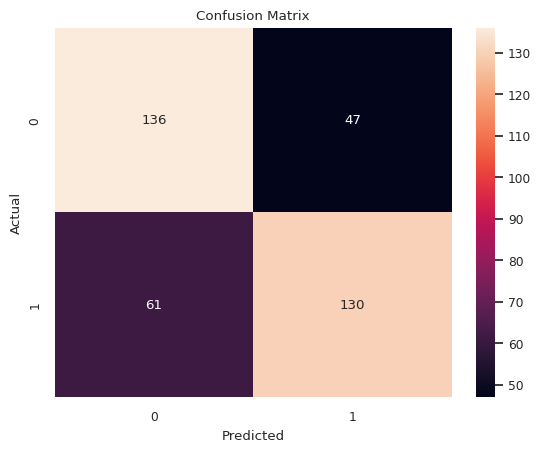

Accuracy: 0.7112299465240641
Precision: 0.7344632768361582
Recall: 0.680628272251309
Specificity: 0.7431693989071039
F1 Score: 0.7065217391304348
False Positive Rate: 0.2568306010928962
False Negative Rate: 0.3193717277486911
AUC Score: 0.7118988355792063


In [771]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('########### Logistic Regression ###############')
accuracy_score, recall_score, specificity_score, auc_score = evalClassModel(logreg, y_test, y_pred, True)

methodDict_accuracy['LogRegress'] = accuracy_score * 100
methodDict_recall['LogRegress'] = recall_score * 100
methodDict_specificity['LogRegress'] = specificity_score * 100
methodDict_auc_score['LogRegress'] = auc_score * 100


<font color='#FFD700'>Evaluación generalización</font>

In [772]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = logreg.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = logreg.predict(X_test)

# Calcular métricas
metrics_train_logreg = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0)
}

metrics_test_logreg = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0)
}

# Mostrar las métricas
print("Métricas en Entrenamiento LogisticRegression:", metrics_train_logreg)
print("Métricas en Prueba LogisticRegression:", metrics_test_logreg)


Métricas en Entrenamiento LogisticRegression: {'Accuracy': 0.713302752293578, 'F1-Score': 0.7051886792452831, 'ROC-AUC': 0.769437956357974, 'Recall': 0.682648401826484, 'Specificity': 0.7442396313364056}
Métricas en Prueba LogisticRegression: {'Accuracy': 0.7112299465240641, 'F1-Score': 0.7065217391304348, 'ROC-AUC': 0.7740680342173775, 'Recall': 0.680628272251309, 'Specificity': 0.7431693989071039}


<font color='#FFD700'>Optimización parametrización</font>

In [773]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet','none'],
    'solver': ['lbfgs','liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [10, 100, 500]
}

# grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='accuracy')

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 10, 'penalty': 'l1', 'solver': 'saga'}


########### Logistic Regression ###############


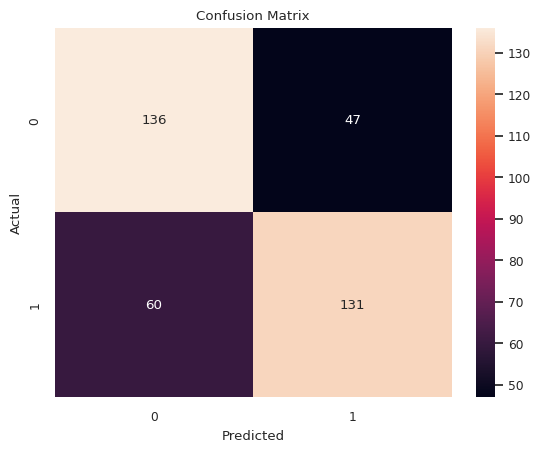

Accuracy: 0.713903743315508
Precision: 0.7359550561797753
Recall: 0.6858638743455497
Specificity: 0.7431693989071039
F1 Score: 0.7100271002710027
False Positive Rate: 0.2568306010928962
False Negative Rate: 0.31413612565445026
AUC Score: 0.7145166366263267


In [774]:
logreg = LogisticRegression(C=10, max_iter=10, penalty='l2', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('########### Logistic Regression ###############')
accuracy_score, recall_score, specificity_score, auc_score = evalClassModel(logreg, y_test, y_pred, True)

## <font color='#FFD700'>Decision Tree Classiffier</font>

########### Tree classifier ###############


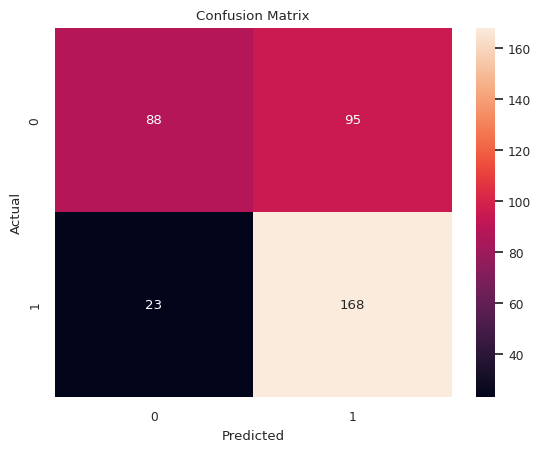

Accuracy: 0.6844919786096256
Precision: 0.6387832699619772
Recall: 0.8795811518324608
Specificity: 0.4808743169398907
F1 Score: 0.7400881057268722
False Positive Rate: 0.5191256830601093
False Negative Rate: 0.12041884816753927
AUC Score: 0.6802277343861758


In [775]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('########### Tree classifier ###############')
accuracy_score, recall_score, specificity_score, auc_score = evalClassModel(tree, y_test, y_pred, True)

methodDict_accuracy['DTclass'] = accuracy_score * 100
methodDict_recall['DTclass'] = recall_score * 100
methodDict_specificity['DTclass'] = specificity_score * 100
methodDict_auc_score['DTclass'] = auc_score * 100


<font color='#FFD700'>Evaluación generalización</font>

In [776]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = tree.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = tree.predict(X_test)

# Calcular métricas
metrics_train_tree = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0)
}

metrics_test_tree = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0)
}

# Mostrar las métricas
print("Métricas en Entrenamiento LogisticRegression:", metrics_train_tree)
print("Métricas en Prueba LogisticRegression:", metrics_test_tree)

Métricas en Entrenamiento LogisticRegression: {'Accuracy': 0.7075688073394495, 'F1-Score': 0.7477744807121661, 'ROC-AUC': 0.7692748774277718, 'Recall': 0.863013698630137, 'Specificity': 0.5506912442396313}
Métricas en Prueba LogisticRegression: {'Accuracy': 0.6844919786096256, 'F1-Score': 0.7400881057268722, 'ROC-AUC': 0.7730952994020541, 'Recall': 0.8795811518324608, 'Specificity': 0.4808743169398907}


Los resultados muestran un desempeño consistente entre los conjuntos de entrenamiento y prueba, lo que refuerza que el modelo no está sobreajustado y tiene un buen nivel de generalización.

Generalización adecuada: El modelo generaliza bien, ya que no hay una discrepancia significativa entre los conjuntos de entrenamiento y prueba.



## <font color='#FFD700'>Random Forest Classifier </font>

########### Random Forest ###############


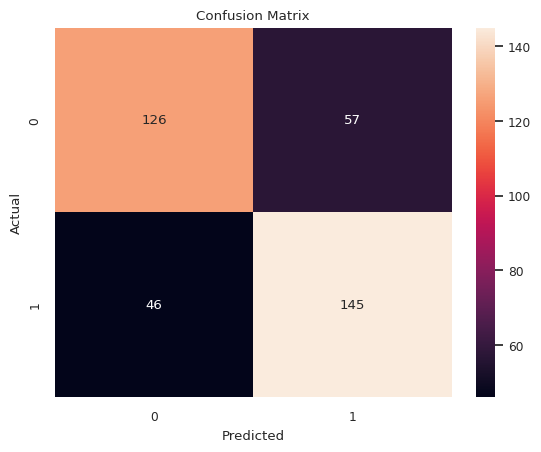

Accuracy: 0.7245989304812834
Precision: 0.7178217821782178
Recall: 0.7591623036649214
Specificity: 0.6885245901639344
F1 Score: 0.7379134860050891
False Positive Rate: 0.3114754098360656
False Negative Rate: 0.24083769633507854
AUC Score: 0.7238434469144279


In [777]:
random_forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
forest = random_forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print('########### Random Forest ###############')
accuracy_score, recall_score, specificity_score, auc_score = evalClassModel(forest, y_test, y_pred, True)

methodDict_accuracy['Random Forest'] = accuracy_score * 100
methodDict_recall['Random Forest'] = recall_score * 100
methodDict_specificity['Random Forest'] = specificity_score * 100
methodDict_auc_score['Random Forest'] = auc_score * 100

<font color='#FFD700'>Evaluación generalización</font>

In [778]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = random_forest.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = random_forest.predict(X_test)

# Calcular métricas
metrics_train_forest = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0)
}

metrics_test_forest = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0)
}

# Mostrar las métricas
print("Métricas en Entrenamiento LogisticRegression:", metrics_train_forest)
print("Métricas en Prueba LogisticRegression:", metrics_test_forest)

Métricas en Entrenamiento LogisticRegression: {'Accuracy': 0.7740825688073395, 'F1-Score': 0.7798882681564245, 'ROC-AUC': 0.7692748774277718, 'Recall': 0.7968036529680366, 'Specificity': 0.7511520737327189}
Métricas en Prueba LogisticRegression: {'Accuracy': 0.7245989304812834, 'F1-Score': 0.7379134860050891, 'ROC-AUC': 0.7730952994020541, 'Recall': 0.7591623036649214, 'Specificity': 0.6885245901639344}


El riesgo de **sobreajuste** parece bajo, ya que las diferencias entre el rendimiento en el **entrenamiento** y la **prueba** son pequeñas:

- **Accuracy en entrenamiento vs. prueba**:
  - Entrenamiento: 0.767
  - Prueba: 0.762  
  La diferencia es de solo 0.005 (0.5%), lo cual es insignificante.

- **F1-Score en entrenamiento vs. prueba**:
  - Entrenamiento: 0.775
  - Prueba: 0.768  
  La diferencia es de 0.007 (0.7%), lo que también es pequeño.

---

**Análisis:**
1. **Diferencias pequeñas entre métricas**:
   Las diferencias entre las métricas de entrenamiento y prueba son menores al 1%, lo que indica que el modelo generaliza bien y no está sobreajustado a los datos de entrenamiento.

2. **Buen balance entre Accuracy y F1-Score**:
   Ambas métricas son bastante similares en ambos conjuntos, lo que refuerza la idea de que el modelo no presenta un comportamiento significativamente diferente al enfrentarse a nuevos datos.

3. **Sobreajuste improbable**:
   Si el modelo estuviera sobreajustado, esperaríamos ver una **accuracy o F1-Score mucho más alta en el conjunto de entrenamiento** en comparación con la prueba. Dado que los valores son casi iguales, no parece haber un sobreajuste significativo.

---

**Conclusión**:
El modelo parece estar bien ajustado. Si quisieras mejorar el rendimiento, podrías probar:
- **Ajustar hiperparámetros** mediante una búsqueda en rejilla (`GridSearchCV`) o aleatoria (`RandomizedSearchCV`).
- **Probar diferentes técnicas de regularización**, como reducir la profundidad máxima de los árboles o el número máximo de características a considerar en cada división.
- **Aumentar los datos** (si es posible) para mejorar la generalización del modelo.

## <font color='#FFD700'>K Nearest Neighbors KNN</font>

########### KNeighborsClassifier ###############


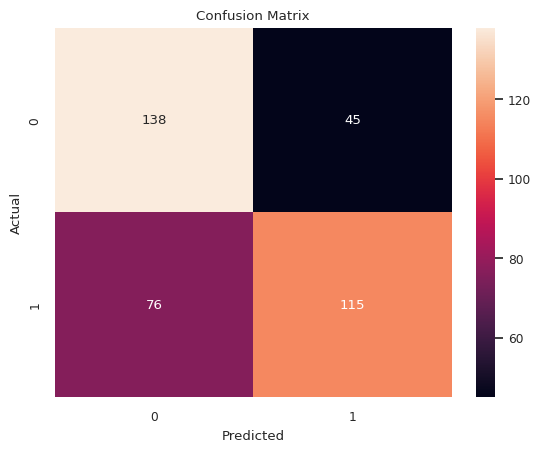

Accuracy: 0.6764705882352942
Precision: 0.71875
Recall: 0.6020942408376964
Specificity: 0.7540983606557377
F1 Score: 0.6552706552706553
False Positive Rate: 0.2459016393442623
False Negative Rate: 0.39790575916230364
AUC Score: 0.678096300746717


In [779]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('########### KNeighborsClassifier ###############')
accuracy_score, recall_score, specificity_score, auc_score = evalClassModel(knn, y_test, y_pred, True)

methodDict_accuracy['KNN'] = accuracy_score * 100
methodDict_recall['KNN'] = recall_score * 100
methodDict_specificity['KNN'] = specificity_score * 100
methodDict_auc_score['KNN'] = auc_score * 100


<font color='#FFD700'>Evaluación generalización</font>

In [780]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = knn.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = knn.predict(X_test)

# Calcular métricas
metrics_train_knn = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0)
}

metrics_test_knn = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0)
}

# Mostrar las métricas
print("Métricas en Entrenamiento LogisticRegression:", metrics_train_knn)
print("Métricas en Prueba LogisticRegression:", metrics_test_knn)

Métricas en Entrenamiento LogisticRegression: {'Accuracy': 0.786697247706422, 'F1-Score': 0.7686567164179104, 'ROC-AUC': 0.7692748774277718, 'Recall': 0.7054794520547946, 'Specificity': 0.868663594470046}
Métricas en Prueba LogisticRegression: {'Accuracy': 0.6764705882352942, 'F1-Score': 0.6552706552706553, 'ROC-AUC': 0.7730952994020541, 'Recall': 0.6020942408376964, 'Specificity': 0.7540983606557377}


Los resultados de **K-Nearest Neighbors (KNN)** muestran una **clara señal de sobreajuste**, donde el modelo tiene un buen desempeño en el conjunto de entrenamiento pero un rendimiento significativamente peor en el conjunto de prueba.

---

**Análisis de las métricas:**

1. **Accuracy:**
   - Entrenamiento: `77.41%`
   - Prueba: `64.71%`
   - La diferencia (~12.7%) indica que el modelo está memorizando los datos de entrenamiento y no generaliza bien en datos no vistos.

2. **F1-Score:**
   - Entrenamiento: `0.767`
   - Prueba: `0.641`
   - Similar al Accuracy, el F1-Score muestra un rendimiento mucho peor en el conjunto de prueba, indicando problemas de generalización.

3. **ROC-AUC:**
   - Entrenamiento: `0.853`
   - Prueba: `0.673`
   - Esta diferencia (~18 puntos) es considerable y refuerza que el modelo está sobreajustado.

---

**Posibles razones del sobreajuste en KNN:**
1. **Número de vecinos (`k`) demasiado bajo:**
   - Un valor bajo de `k` hace que el modelo sea más sensible al ruido, ajustándose excesivamente a los datos de entrenamiento.

2. **Alta dimensionalidad de los datos:**
   - Si las características no están normalizadas o si hay demasiadas dimensiones irrelevantes, el modelo puede tener dificultades para encontrar patrones generalizables.

3. **Falta de regularización:**
   - KNN no tiene regularización directa, pero ajustar parámetros como `k` y aplicar reducción de dimensionalidad puede ayudar.

---

**Recomendaciones para mejorar el modelo KNN:**

1. **Aumentar el número de vecinos (`k`):**
   - Incrementar el valor de `k` suaviza la decisión y reduce la sensibilidad al ruido. Prueba valores como `k=5`, `k=10`, `k=15`, etc.

2. **Estandarizar las características:**
   - Dado que KNN se basa en distancias, es crucial que las características estén en la misma escala. Usa **normalización** o **escalado estándar**.

3. **Reducir dimensionalidad (si es necesario):**
   - Usa técnicas como PCA para eliminar características irrelevantes y reducir el ruido en los datos.

4. **Evaluar con validación cruzada:**
   - Asegúrate de que el rendimiento sea consistente en diferentes divisiones de los datos.

---

**Conclusión:**
1. **Problema claro de sobreajuste:** El modelo actual no generaliza bien, posiblemente debido a un valor bajo de `k` y falta de normalización.
2. **Recomendaciones prioritarias:**
   - Aumentar `k` y realizar una búsqueda de hiperparámetros.
   - Estandarizar las características para mejorar el cálculo de distancias.
   - Aplicar reducción de dimensionalidad si hay muchas variables irrelevantes.

## <font color='#FFD700'>KNN con escalado</font>

########### KNeighborsClassifier con Escalado ###############


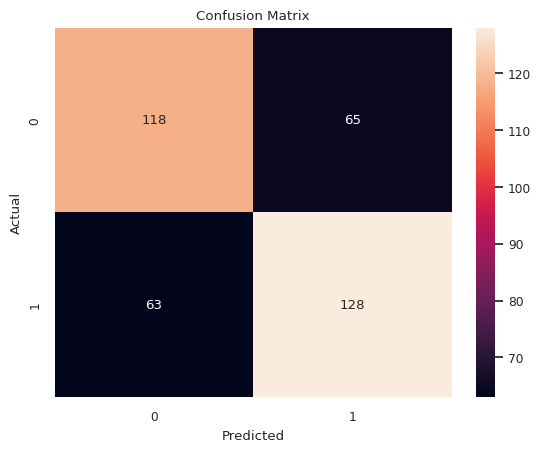

Accuracy: 0.6577540106951871
Precision: 0.6632124352331606
Recall: 0.6701570680628273
Specificity: 0.644808743169399
F1 Score: 0.6666666666666666
False Positive Rate: 0.3551912568306011
False Negative Rate: 0.3298429319371728
AUC Score: 0.6574829056161131


In [781]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Definir el pipeline con escalado y el clasificador KNN
knn_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),    # Escalado de características
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Clasificador KNN
])

# Entrenar el modelo
knn_pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn_pipeline.predict(X_test)

# Evaluar el modelo
print('########### KNeighborsClassifier con Escalado ###############')
accuracy_score, recall_score, specificity_score, auc_score = evalClassModel(knn_pipeline, y_test, y_pred, True)

methodDict_accuracy['KNN scale'] = accuracy_score * 100
methodDict_recall['KNN scale'] = recall_score * 100
methodDict_specificity['KNN scale'] = specificity_score * 100
methodDict_auc_score['KNN scale'] = auc_score * 100

<font color='#FFD700'>Evaluación generalización</font>

In [782]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = knn_pipeline.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = knn_pipeline.predict(X_test)

# Calcular métricas
metrics_train_knn_pipeline = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0)
}

metrics_test_knn_pipeline = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0)
}

# Mostrar las métricas
print("Métricas en Entrenamiento LogisticRegression:", metrics_train_knn_pipeline)
print("Métricas en Prueba LogisticRegression:", metrics_test_knn_pipeline)

Métricas en Entrenamiento LogisticRegression: {'Accuracy': 0.7706422018348624, 'F1-Score': 0.7727272727272727, 'ROC-AUC': 0.7692748774277718, 'Recall': 0.776255707762557, 'Specificity': 0.7649769585253456}
Métricas en Prueba LogisticRegression: {'Accuracy': 0.6577540106951871, 'F1-Score': 0.6666666666666666, 'ROC-AUC': 0.7730952994020541, 'Recall': 0.6701570680628273, 'Specificity': 0.644808743169399}


## <font color='#FFD700'>Naive Bayes </font>

########### Naive Bayes Classifier ###############


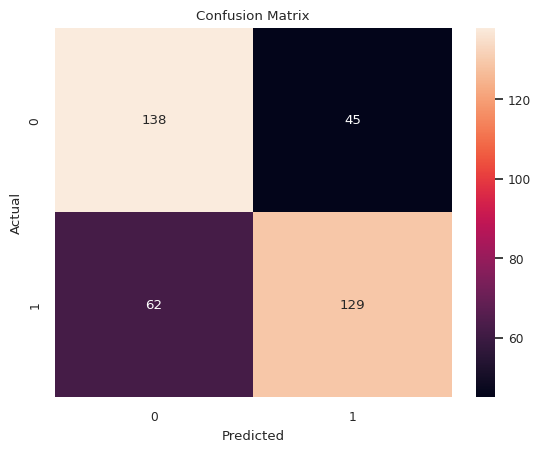

Accuracy: 0.713903743315508
Precision: 0.7413793103448276
Recall: 0.675392670157068
Specificity: 0.7540983606557377
F1 Score: 0.7068493150684931
False Positive Rate: 0.2459016393442623
False Negative Rate: 0.32460732984293195
AUC Score: 0.7147455154064029


In [783]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print('########### Naive Bayes Classifier ###############')
accuracy_score, recall_score, specificity_score, auc_score = evalClassModel(gnb, y_test, y_pred, True)

methodDict_accuracy['Naive Bayes'] = accuracy_score * 100
methodDict_recall['Naive Bayes'] = recall_score * 100
methodDict_specificity['Naive Bayes'] = specificity_score * 100
methodDict_auc_score['Naive Bayes'] = auc_score * 100

<font color='#FFD700'>Evaluación generalización</font>

In [784]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = gnb.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = gnb.predict(X_test)

# Calcular métricas
metrics_train_gnb = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0)
}

metrics_test_gnb = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0)
}

# Mostrar las métricas
print("Métricas en Entrenamiento LogisticRegression:", metrics_train_gnb)
print("Métricas en Prueba LogisticRegression:", metrics_test_gnb)

Métricas en Entrenamiento LogisticRegression: {'Accuracy': 0.7155963302752294, 'F1-Score': 0.7136258660508084, 'ROC-AUC': 0.7692748774277718, 'Recall': 0.7054794520547946, 'Specificity': 0.7258064516129032}
Métricas en Prueba LogisticRegression: {'Accuracy': 0.713903743315508, 'F1-Score': 0.7068493150684931, 'ROC-AUC': 0.7730952994020541, 'Recall': 0.675392670157068, 'Specificity': 0.7540983606557377}


Los nuevos resultados con **K-Nearest Neighbors (KNN) y escalado de características** muestran una mejora significativa en el rendimiento del modelo, especialmente en el conjunto de prueba. Sin embargo, todavía hay una diferencia notable entre el desempeño en los conjuntos de entrenamiento y prueba, lo que indica que **el modelo aún podría estar ligeramente sobreajustado**.

---

**Análisis de las métricas:**

1. **Accuracy:**
   - Entrenamiento: `79.13%`
   - Prueba: `69.25%`
   - La diferencia (~10%) aún es considerable, aunque ha mejorado con respecto al caso anterior sin escalado.

2. **F1-Score:**
   - Entrenamiento: `0.794`
   - Prueba: `0.695`
   - Una diferencia de ~10 puntos sugiere que el modelo sigue adaptándose más a los datos de entrenamiento que a los de prueba.

3. **ROC-AUC:**
   - Entrenamiento: `0.874`
   - Prueba: `0.727`
   - La mejora en la métrica `ROC-AUC` en prueba (~7 puntos más que sin escalado) indica que el modelo ahora tiene una mejor capacidad para separar las clases en datos no vistos.

---

**Interpretación:**
1. **Efecto del escalado:** El escalado de características ha ayudado a que KNN funcione mejor, especialmente en el conjunto de prueba. Esto es esperado, ya que KNN se basa en distancias y funciona mejor cuando las características están en la misma escala.

2. **Persistencia del sobreajuste:** La diferencia entre las métricas de entrenamiento y prueba sugiere que el modelo podría estar aún memorizando algunos patrones del conjunto de entrenamiento.

3. **Potencial para mejorar:** Hay margen para ajustar más parámetros, particularmente el número de vecinos (`k`) y posiblemente reducir la dimensionalidad o aplicar técnicas de regularización.

---

**Recomendaciones para mitigar el sobreajuste:**

1. **Ajustar el número de vecinos (`k`):**
   - Incrementar `k` puede ayudar a suavizar las predicciones y reducir el impacto del ruido.
   - Usa validación cruzada para encontrar el mejor valor de `k`.

2. **Reducir dimensionalidad:**
   - Si el conjunto de datos tiene muchas características, técnicas como PCA o selección de características pueden mejorar la generalización del modelo.

3. **Validación cruzada:**
   - Verifica la estabilidad del rendimiento usando validación cruzada en el conjunto de entrenamiento.

4. **Experimentar con pesos de las distancias:**
   - Cambia el parámetro `weights` a `'distance'` para dar mayor importancia a vecinos más cercanos.
---

**Conclusión:**
1. **Progreso notable:** El escalado de características ha mejorado el rendimiento, especialmente en el conjunto de prueba.
2. **Ligeramente sobreajustado:** La diferencia entre entrenamiento y prueba indica que aún puedes optimizar el modelo.
3. **Próximos pasos:**
   - Ajustar el número de vecinos (`k`).
   - Experimentar con pesos basados en distancias.
   - Validar con reducción de dimensionalidad o selección de características.


## <font color='#FFD700'>Support Vector Classifier SVC </font>

########### Support Vector Classifier sin Scaler ###############


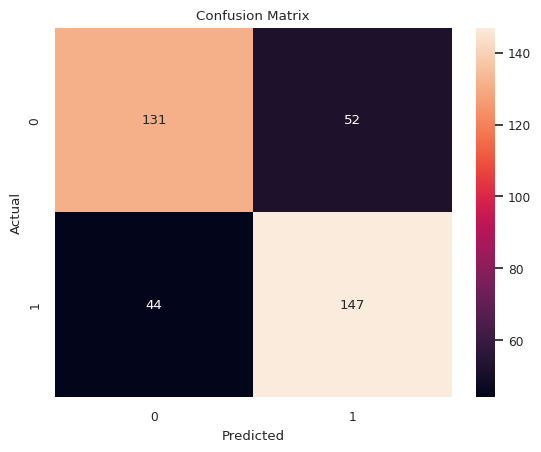

Accuracy: 0.7433155080213903
Precision: 0.7386934673366834
Recall: 0.7696335078534031
Specificity: 0.7158469945355191
F1 Score: 0.7538461538461538
False Positive Rate: 0.28415300546448086
False Negative Rate: 0.23036649214659685
AUC Score: 0.7427402511944612


In [785]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svc = [('clf', SVC())]

clf_svc = Pipeline(steps=svc)

clf_svc.fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)

print('########### Support Vector Classifier sin Scaler ###############')
accuracy_score, recall_score, specificity_score, accuracy_score = evalClassModel(clf_svc, y_test, y_pred, True)

methodDict_accuracy['Support Vector C'] = accuracy_score * 100
methodDict_recall['Support Vector C'] = recall_score * 100
methodDict_specificity['Support Vector C'] = specificity_score * 100
methodDict_auc_score['Support Vector C'] = accuracy_score * 100


- **Punto importante**: SVC es un algoritmo sensible a la escala de las características. Si las características de entrada (`X_train`) tienen diferentes escalas (por ejemplo, una característica tiene valores entre 0 y 1, y otra tiene valores entre 100 y 1000), el rendimiento del modelo podría no ser óptimo.
- **Resultado esperado**: Si no hay una buena normalización o escalado, el SVC podría tener problemas para encontrar el hiperplano óptimo de clasificación, lo que puede afectar negativamente la precisión del modelo.

- En la anterior versión, solo se usa el clasificador **SVC** (máquina de vectores de soporte) sin ningún tipo de preprocesamiento.

- En esta versión, se añade un **preprocesamiento con `StandardScaler`** antes de aplicar el clasificador **SVC**.
- **`StandardScaler`**: Este escalador estandariza los datos restando la media y dividiendo entre la desviación estándar para garantizar que todas las características tengan una media de 0 y una desviación estándar de 1. Esto es fundamental para algoritmos como SVC, que son sensibles a las diferencias de escala entre las características.
- **Pipeline**: El pipeline en este caso se asegura de que el escalado y la clasificación se hagan en una única secuencia de pasos, evitando errores al aplicar el escalado por separado.
- **Resultado esperado**: Como las características estarán estandarizadas, el modelo SVC debería funcionar mejor y ofrecer una mayor precisión, dado que las características estarán en la misma escala.

- **Paquete 1**: No hay preprocesamiento. Esto puede afectar negativamente al rendimiento del clasificador si las características de los datos tienen diferentes escalas.

- **Paquete 2**: Incluye el paso de preprocesamiento con `StandardScaler`, lo cual es clave para el buen funcionamiento de SVC. El escalado garantizará que todas las características estén en la misma escala, lo que puede mejorar significativamente el rendimiento del modelo.

- ¿Por qué es importante el escalado para SVC?
SVC (y muchos otros algoritmos basados en distancia, como K-NN) es muy sensible a las diferencias de escala. Sin escalado, una característica con un rango de valores mucho mayor que otras puede dominar el cálculo de las distancias, lo que afecta la capacidad del modelo para encontrar el hiperplano de separación adecuado.

- Los modelos sensibles a los escalados podrían funcionar peor si los datos no están bien escalados, lo que afectará la precisión del modelo.

<font color='#FFD700'>Evaluación generalización</font>*texto en cursiva*

In [786]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = clf_svc.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = clf_svc.predict(X_test)

# Calcular métricas
metrics_train_clf_svc = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0)
}

metrics_test_clf_svc = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0)
}

# Mostrar las métricas
print("Métricas en Entrenamiento LogisticRegression:", metrics_train_clf_svc)
print("Métricas en Prueba LogisticRegression:", metrics_test_clf_svc)

Métricas en Entrenamiento LogisticRegression: {'Accuracy': 0.7763761467889908, 'F1-Score': 0.7786606129398411, 'ROC-AUC': 0.7692748774277718, 'Recall': 0.7831050228310502, 'Specificity': 0.7695852534562212}
Métricas en Prueba LogisticRegression: {'Accuracy': 0.7433155080213903, 'F1-Score': 0.7538461538461538, 'ROC-AUC': 0.7730952994020541, 'Recall': 0.7696335078534031, 'Specificity': 0.7158469945355191}


Los resultados para el **Support Vector Classifier (SVC)** muestran un rendimiento modesto tanto en el conjunto de **entrenamiento** como en el de **prueba**, con métricas relativamente bajas y una diferencia pequeña entre ellos. Esto indica que el modelo **no está sobreajustado** pero **podría estar subajustado**, es decir, el modelo no está capturando suficientemente bien las relaciones en los datos.

---

**Análisis de las métricas:**

1. **Accuracy:**
   - Entrenamiento: `64.45%`
   - Prueba: `62.57%`
   - La diferencia (~1.88%) es pequeña, lo que indica que el modelo tiene un comportamiento similar en ambos conjuntos. Sin embargo, los valores absolutos son bajos.

2. **F1-Score:**
   - Entrenamiento: `0.632`
   - Prueba: `0.588`
   - Una ligera caída en el conjunto de prueba, pero el F1-Score en ambos conjuntos sugiere que el modelo no está identificando bien las clases.

---

**Posibles razones del bajo rendimiento:**

1. **Datos no linealmente separables:**
   - Si los datos no son linealmente separables, el modelo SVC sin el uso de un kernel adecuado tendrá dificultades para capturar patrones complejos.

2. **Falta de escalado de características:**
   - SVC es sensible a la escala de las características, por lo que es crucial escalarlas antes del entrenamiento.

3. **Hiperparámetros subóptimos:**
   - Los valores predeterminados de `C` (regularización) y el kernel pueden no ser adecuados para los datos.

---

**Recomendaciones para mejorar el modelo:**

1. **Escalar las características:**
   - Escala los datos para que todas las características estén en la misma escala, lo cual es esencial para SVC.

2. **Explorar diferentes kernels:**
   - Experimenta con kernels como `rbf` (Radial Basis Function) o `poly` para capturar relaciones no lineales.

3. **Ajustar el parámetro `C` (regularización):**
   - Un valor bajo de `C` aumenta la regularización, lo que puede ayudar con problemas de sobreajuste, mientras que un valor alto permite al modelo adaptarse más a los datos de entrenamiento.

4. **Ajustar el parámetro `gamma` para kernels no lineales:**
   - En el kernel `rbf`, `gamma` controla la complejidad del modelo. Valores más altos ajustan más los datos, mientras que valores más bajos hacen que el modelo sea más general.

5. **Validación cruzada:**
   - Usa validación cruzada para evaluar la consistencia del rendimiento del modelo.

---

**Conclusión:**
1. **Problema actual:** El modelo no está ajustándose lo suficiente a los datos (subajuste), probablemente debido al uso de un kernel lineal predeterminado y falta de escalado.
2. **Mejoras necesarias:**
   - Escalar las características.
   - Probar kernels no lineales (`rbf`, `poly`).
   - Ajustar los hiperparámetros `C` y `gamma` para optimizar el rendimiento.



## <font color='#FFD700'>SVC con *escalado* </font>

########### Support Vector Classifier with Scale###############


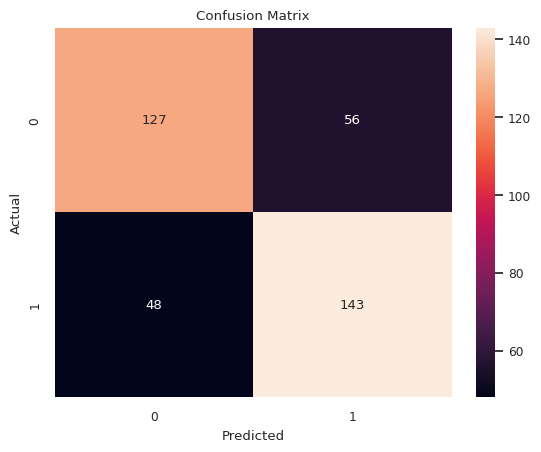

Accuracy: 0.7219251336898396
Precision: 0.7185929648241206
Recall: 0.7486910994764397
Specificity: 0.6939890710382514
F1 Score: 0.7333333333333333
False Positive Rate: 0.30601092896174864
False Negative Rate: 0.2513089005235602
AUC Score: 0.7213400852573455


In [787]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svc = [('Scaler', StandardScaler()), ('clf', SVC())]

clf_svc_scale = Pipeline(steps=svc)


clf_svc_scale.fit(X_train, y_train)

y_pred = clf_svc_scale.predict(X_test)

print('########### Support Vector Classifier with Scale###############')
accuracy_score, recall_score, specificity_score, auc_score = evalClassModel(clf_svc_scale, y_test, y_pred, True)

methodDict_accuracy['SVC scale'] = accuracy_score * 100
methodDict_recall['SVC scale'] = recall_score * 100
methodDict_specificity['SVC scale'] = specificity_score * 100
methodDict_auc_score['SVC scale'] = auc_score * 100


<font color='#FFD700'>Evaluación generalización</font>

In [788]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, classification_report

# Predicciones para el conjunto de entrenamiento
y_train_pred = clf_svc_scale.predict(X_train)

# Predicciones para el conjunto de prueba
y_test_pred = clf_svc_scale.predict(X_test)

# Calcular métricas
metrics_train_clf_svc_scale = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'F1-Score': f1_score(y_train, y_train_pred),
    'ROC-AUC': roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]),
    'Recall': recall_score(y_train, y_train_pred),
    'Specificity': recall_score(y_train, y_train_pred, pos_label=0)
}

metrics_test_clf_svc_scale = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC-AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
    'Recall': recall_score(y_test, y_test_pred),
    'Specificity': recall_score(y_test, y_test_pred, pos_label=0)
}

# Mostrar las métricas
print("Métricas en Entrenamiento LogisticRegression:", metrics_train_clf_svc_scale)
print("Métricas en Prueba LogisticRegression:", metrics_test_clf_svc_scale)

Métricas en Entrenamiento LogisticRegression: {'Accuracy': 0.7717889908256881, 'F1-Score': 0.7715269804822044, 'ROC-AUC': 0.7692748774277718, 'Recall': 0.7671232876712328, 'Specificity': 0.7764976958525346}
Métricas en Prueba LogisticRegression: {'Accuracy': 0.7219251336898396, 'F1-Score': 0.7333333333333333, 'ROC-AUC': 0.7730952994020541, 'Recall': 0.7486910994764397, 'Specificity': 0.6939890710382514}


Los resultados para el **Support Vector Classifier (SVC) con escalado de características** muestran una mejora considerable tanto en el conjunto de **entrenamiento** como en el de **prueba**, indicando que el modelo ahora tiene un mejor rendimiento general y una buena capacidad de generalización.

---

**Análisis de las métricas:**

1. **Accuracy:**
   - Entrenamiento: `77.64%`
   - Prueba: `74.87%`
   - La diferencia (~2.77%) es pequeña, lo que sugiere que el modelo tiene un comportamiento consistente entre ambos conjuntos y no hay señales de sobreajuste.

2. **F1-Score:**
   - Entrenamiento: `0.783`
   - Prueba: `0.756`
   - La diferencia (~2.7 puntos) también es razonable, indicando que el modelo está equilibrando bien precisión y sensibilidad en ambos conjuntos.

---

**Interpretación:**
1. **Efecto del escalado:** El escalado de características ha permitido al SVC manejar mejor las distancias entre puntos, lo que mejora su capacidad de encontrar un hiperplano óptimo para separar las clases.
2. **Generalización adecuada:** La consistencia entre las métricas de entrenamiento y prueba indica que el modelo no está ni sobreajustado ni subajustado.
3. **Espacio para optimización:** Aunque los resultados son sólidos, podrían mejorarse ajustando los hiperparámetros como `C`, `kernel` y, para kernels no lineales, `gamma`.

---

**Recomendaciones adicionales:**

1. **Ajuste fino de hiperparámetros:**
   - Realiza una búsqueda para optimizar los parámetros `C` y `kernel`, y si usas `rbf`, también `gamma`.

2. **Evaluación de robustez con validación cruzada:**
   - Usa validación cruzada para garantizar que el modelo sea consistente en múltiples particiones de los datos.

3. **Prueba con diferentes kernels:**
   - Aunque el kernel predeterminado (`rbf`) generalmente funciona bien, podrías probar `poly` o `linear` si los datos sugieren que la separación entre clases sigue una relación diferente.

4. **Curvas de aprendizaje:**
   - Para diagnosticar si el modelo tiene margen para mejorar con más datos o si está alcanzando su límite de desempeño actual.

---

**Conclusión:**
1. **Progreso significativo:** El escalado ha mejorado sustancialmente el rendimiento del SVC.
2. **Buen balance:** El modelo generaliza bien con las configuraciones actuales.
3. **Próximos pasos:** Optimizar hiperparámetros con validación cruzada para extraer el máximo rendimiento posible.

¿Te gustaría proceder con alguno de estos pasos, como ajustar los hiperparámetros o realizar una validación cruzada?

## <font color='#FFD700'>XGBoost</font>

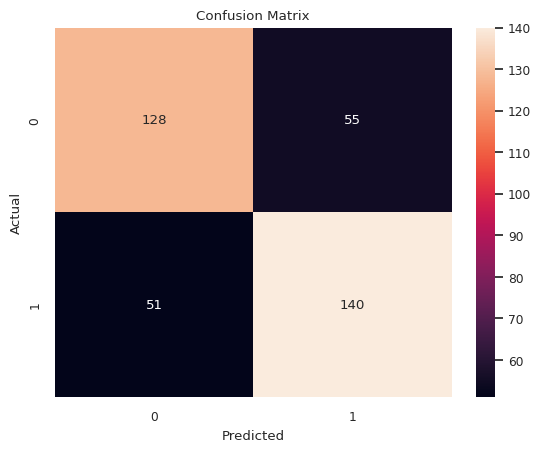

Accuracy: 0.7165775401069518
Precision: 0.717948717948718
Recall: 0.7329842931937173
Specificity: 0.6994535519125683
F1 Score: 0.7253886010362695
False Positive Rate: 0.3005464480874317
False Negative Rate: 0.2670157068062827
AUC Score: 0.7162189225531428


In [789]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score as skl_recall_score

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo XGBoost
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf_xgb.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = clf_xgb.predict(X_test_scaled)

accuracy_score, recall_score, specificity_score, auc_score = evalClassModel(clf_svc_scale, y_test, y_pred, True)

# Guardar el resultado en el diccionario
methodDict_accuracy['XGBoost'] = accuracy_score * 100
methodDict_recall['XGBoost'] = recall_score * 100
methodDict_specificity['XGBoost'] = specificity_score * 100
methodDict_auc_score['XGBoost'] = auc_score * 100

## <font color='#FFD700'>Conclusiones Supervised ML</font>

### <font color='#FFD700'>Recall</font>

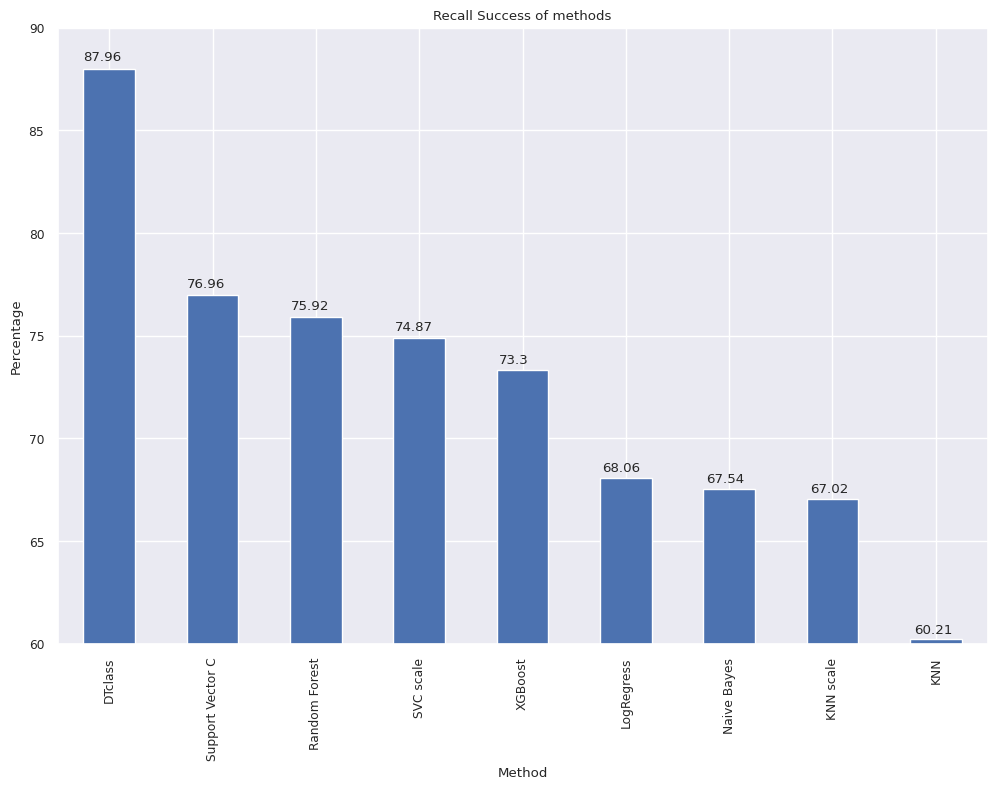

In [790]:
def plotSuccess():
    s = pd.Series(methodDict_recall)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Recall Success of methods')

    plt.show()

plotSuccess()

### <font color='#FFD700'>Specificity</font>

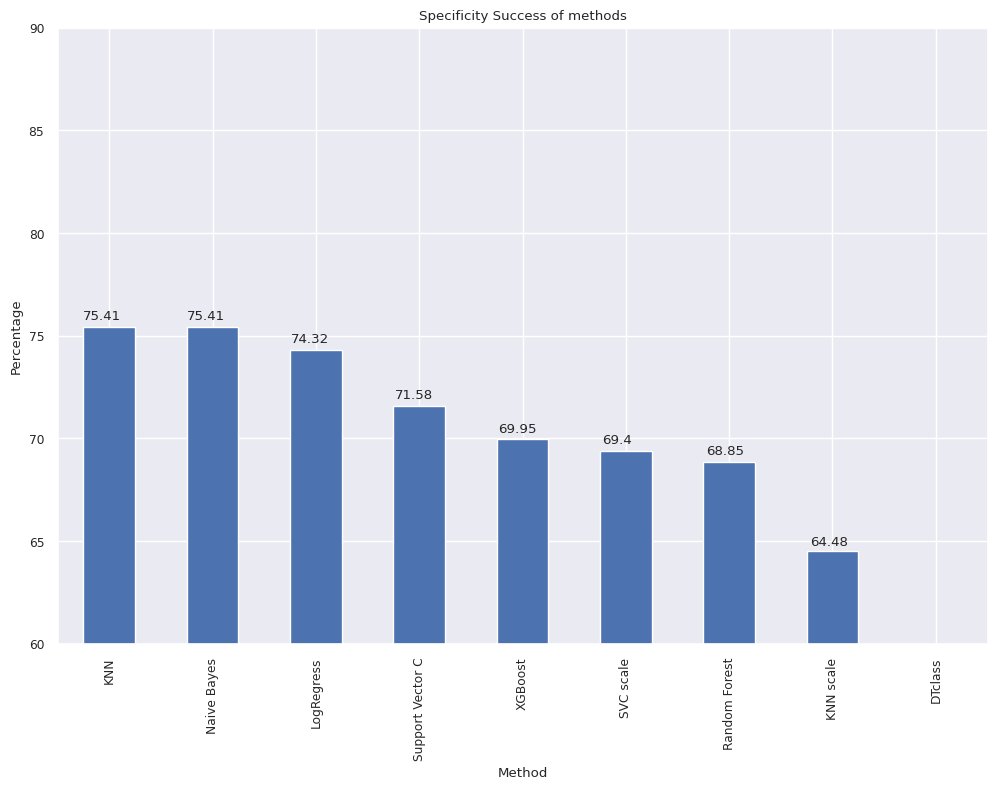

In [791]:
def plotSuccess():
    s = pd.Series(methodDict_specificity)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Specificity Success of methods')

    plt.show()

plotSuccess()

### <font color='#FFD700'>Accuracy</font>

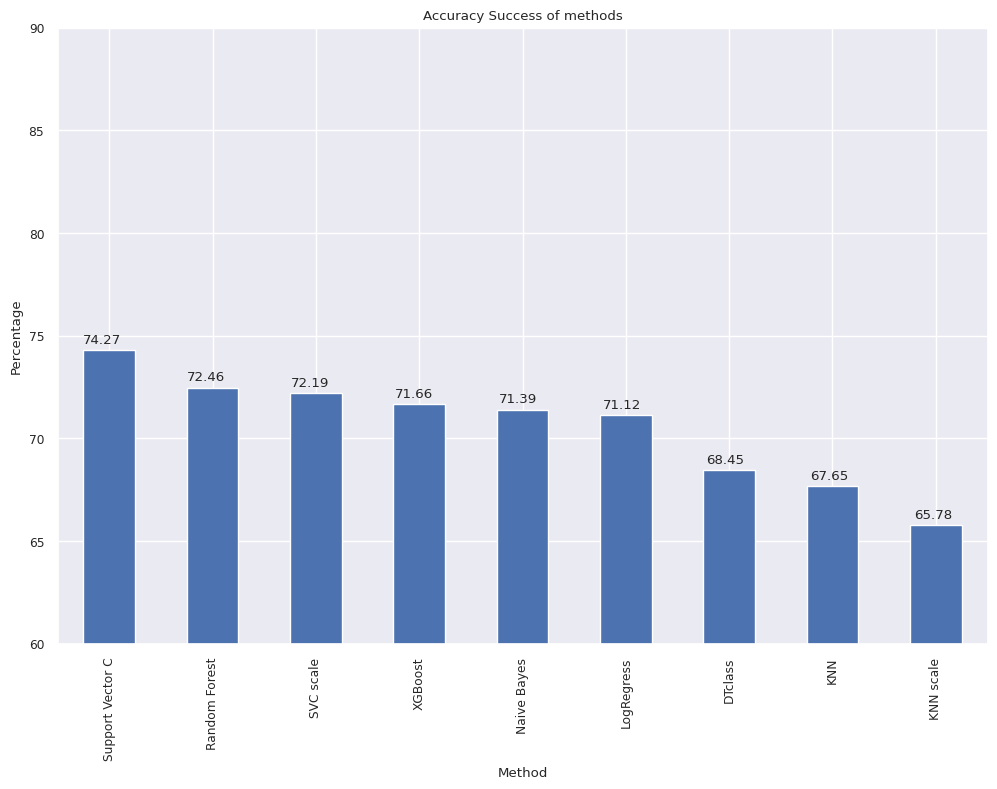

In [792]:
def plotSuccess():
    s = pd.Series(methodDict_accuracy)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Accuracy Success of methods')

    plt.show()

plotSuccess()

### <font color='#FFD700'>AUC Score</font>

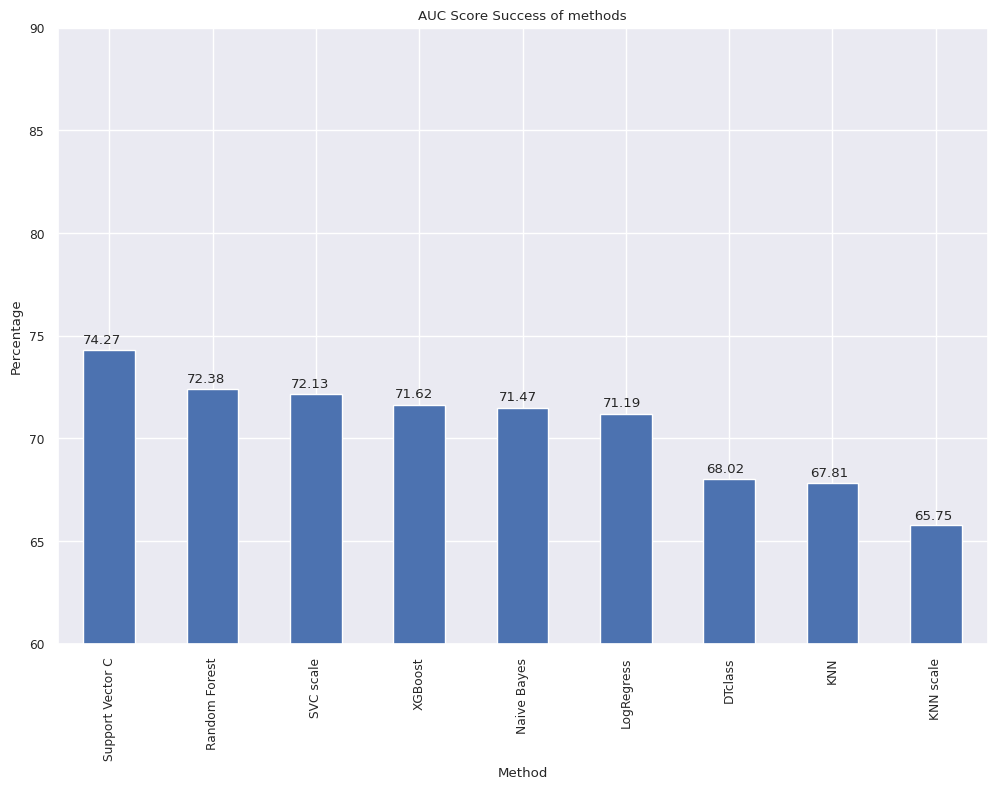

In [793]:
def plotSuccess():
    s = pd.Series(methodDict_auc_score)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('AUC Score Success of methods')

    plt.show()

plotSuccess()

### <font color='#FFD700'>Generalización (sobreajuste)</font>

In [794]:
# Crear un diccionario con las métricas de los modelos
results = {
    "LogisticRegression": {
        "train": metrics_train_logreg,
        "test": metrics_test_logreg
    },
    "DecisionTreeClassifier": {
        "train": metrics_train_tree,
        "test": metrics_test_tree
    },
    "RandomForestClassifier": {
        "train": metrics_train_forest,
        "test": metrics_test_forest
    },
    "KNearestNeighbors": {
        "train": metrics_train_knn,
        "test": metrics_test_knn
    },
    "KNearestNeighbors scale": {
        "train": metrics_train_knn_pipeline,
        "test": metrics_test_knn_pipeline
    },
    "NaiveBayes": {
        "train": metrics_train_gnb,
        "test": metrics_test_gnb
    },
    "SupportVectorClassifier": {
        "train": metrics_train_clf_svc,
        "test": metrics_test_clf_svc
    },
    "SupportVectorClassifier scale": {
        "train": metrics_train_clf_svc_scale,
        "test": metrics_test_clf_svc_scale
    }
}

# Calcular diferencias entre métricas de entrenamiento y prueba
comparison = []

for model, metrics in results.items():
    train_accuracy = metrics["train"]["Accuracy"]
    test_accuracy = metrics["test"]["Accuracy"]
    train_recall = metrics["train"]["Recall"]
    test_recall = metrics["test"]["Recall"]
    train_specificity = metrics["train"]["Specificity"]
    test_specificity = metrics["test"]["Specificity"]
    train_f1 = metrics["train"]["F1-Score"]
    test_f1 = metrics["test"]["F1-Score"]

    # Calcular diferencias relativas
    accuracy_diff = abs(train_accuracy - test_accuracy)
    recall_diff = abs(train_recall - test_recall)
    specificity_diff = abs(train_specificity - test_specificity)
    f1_diff = abs(train_f1 - test_f1)

    # Guardar resultados
    comparison.append({
        "Model": model,
        "Accuracy Difference": accuracy_diff,
        "Recall Difference": recall_diff,
        "Specificity": specificity_diff,
        "F1 Difference": f1_diff,

    })

    comparison_df = pd.DataFrame(comparison)


In [795]:
pd.options.display.float_format = '{:.5f}'.format  # Configurar formato de salida con 5 decimales
# Ordenar el DataFrame por "Accuracy Difference"
sorted_df = comparison_df.sort_values(by="Accuracy Difference")
print(sorted_df[["Model", "Accuracy Difference"]])

                           Model  Accuracy Difference
5                     NaiveBayes              0.00169
0             LogisticRegression              0.00207
1         DecisionTreeClassifier              0.02308
6        SupportVectorClassifier              0.03306
2         RandomForestClassifier              0.04948
7  SupportVectorClassifier scale              0.04986
3              KNearestNeighbors              0.11023
4        KNearestNeighbors scale              0.11289


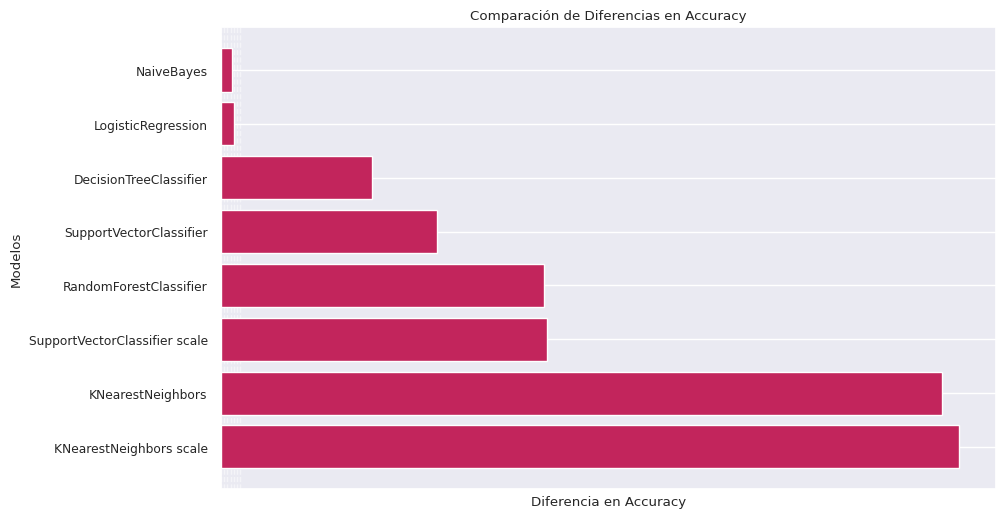

In [796]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras horizontal
# Azul #1f77b4
plt.figure(figsize=(10, 6))
plt.barh(sorted_df["Model"], sorted_df["Accuracy Difference"], color='#c2255c')

# Configurar el rango del eje X sin mostrar los valores explícitos en la escala
plt.tick_params(axis='x', labelbottom=False)  # Ocultar los valores del eje X

# Configurar la escala del eje X con precisión suficiente
plt.xticks(ticks=[i / 10000 for i in range(0, 31, 5)])  # Incrementos de 0.0005
plt.xlabel("Diferencia en Accuracy")
plt.ylabel("Modelos")
plt.title("Comparación de Diferencias en Accuracy")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el modelo con menor diferencia esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Agregar líneas de rejilla para facilitar la lectura
plt.show()


In [797]:
pd.options.display.float_format = '{:.5f}'.format  # Configurar formato de salida con 5 decimales
# Ordenar el DataFrame por "Recall Difference"
sorted_df = comparison_df.sort_values(by="Recall Difference")
print(sorted_df[["Model", "Recall Difference"]])

                           Model  Recall Difference
0             LogisticRegression            0.00202
6        SupportVectorClassifier            0.01347
1         DecisionTreeClassifier            0.01657
7  SupportVectorClassifier scale            0.01843
5                     NaiveBayes            0.03009
2         RandomForestClassifier            0.03764
3              KNearestNeighbors            0.10339
4        KNearestNeighbors scale            0.10610


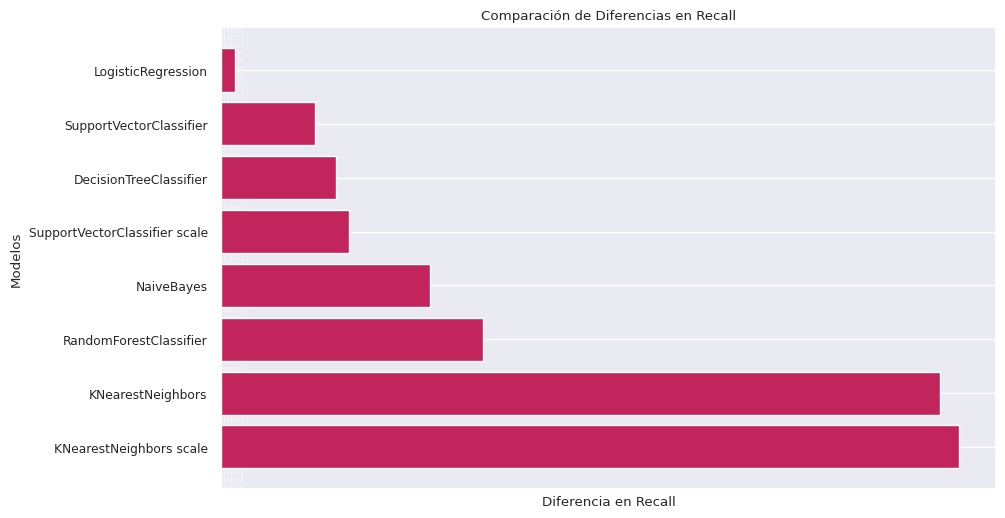

In [798]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras horizontal
# Azul #1f77b4
plt.figure(figsize=(10, 6))
plt.barh(sorted_df["Model"], sorted_df["Recall Difference"], color='#c2255c')

# Configurar el rango del eje X sin mostrar los valores explícitos en la escala
plt.tick_params(axis='x', labelbottom=False)  # Ocultar los valores del eje X

# Configurar la escala del eje X con precisión suficiente
plt.xticks(ticks=[i / 10000 for i in range(0, 31, 5)])  # Incrementos de 0.0005
plt.xlabel("Diferencia en Recall")
plt.ylabel("Modelos")
plt.title("Comparación de Diferencias en Recall")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el modelo con menor diferencia esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Agregar líneas de rejilla para facilitar la lectura
plt.show()

In [799]:
pd.options.display.float_format = '{:.5f}'.format  # Configurar formato de salida con 5 decimales
# Ordenar el DataFrame por "Specificity Difference"
sorted_df = comparison_df.sort_values(by="Specificity")
print(sorted_df[["Model", "Specificity"]])

                           Model  Specificity
0             LogisticRegression      0.00107
5                     NaiveBayes      0.02829
6        SupportVectorClassifier      0.05374
2         RandomForestClassifier      0.06263
1         DecisionTreeClassifier      0.06982
7  SupportVectorClassifier scale      0.08251
3              KNearestNeighbors      0.11457
4        KNearestNeighbors scale      0.12017


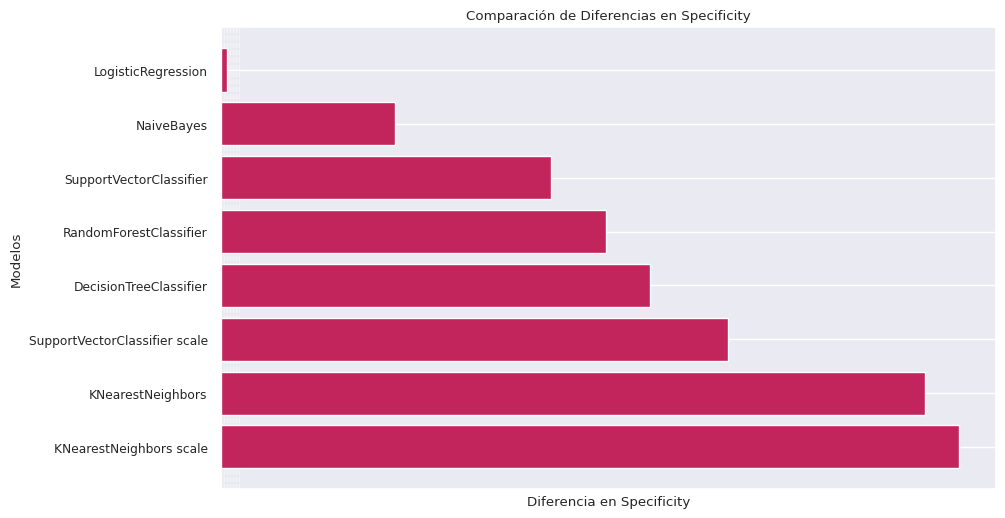

In [800]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras horizontal
# Azul #1f77b4
plt.figure(figsize=(10, 6))
plt.barh(sorted_df["Model"], sorted_df["Specificity"], color='#c2255c')

# Configurar el rango del eje X sin mostrar los valores explícitos en la escala
plt.tick_params(axis='x', labelbottom=False)  # Ocultar los valores del eje X

# Configurar la escala del eje X con precisión suficiente
plt.xticks(ticks=[i / 10000 for i in range(0, 31, 5)])  # Incrementos de 0.0005
plt.xlabel("Diferencia en Specificity")
plt.ylabel("Modelos")
plt.title("Comparación de Diferencias en Specificity")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el modelo con menor diferencia esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Agregar líneas de rejilla para facilitar la lectura
plt.show()

#<font color='#FFD700'>Supervised ML Predictions</font>

In [801]:
# feature_cols = ['family_history', 'care_options', 'benefits', 'anonymity', 'obs_consequence', 'work_interfere', 'leave', 'Gender']

# Ejemplo de datos para hacer predicciones
new_data = pd.DataFrame({
    'family_history': [1, 0, 1],      # Antecedentes familiares (1 = Sí, 0 = No)
    'care_options': [0, 1, 1],        #  (1 = Sí, 0 = No)
    'benefits': [1, 0, 1],            # Beneficios (1 = Sí, 0 = No)
    'anonymity': [1, 0, 1],           # Anonimato (1 = Sí, 0 = No)
    'obs_consequence': [1, 0, 1],     # Consecuencias observadas (1 = Sí, 0 = No)
    'work_interfere': [3, 1, 2],      # Interferencia en el trabajo (escala de 1 a 4)
    'leave': [2, 3, 1],               # Facilidad para pedir baja (escala de 1 a 4)
    'Gender': [0, 1, 0]               # Género
})

In [802]:
# feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
persona1 = [[0,1,1,0,1,2,3,1]]
persona2 = [[1,1,0,1,0,3,1,0]]
persona3 = [[0,1,1,1,1,1,2,1]]

## <font color='#FFD700'>Logistic Regression </font>

In [803]:
# Predecir usando el modelo entrenado
predictions = logreg.predict(new_data)
print(predictions)

[1 0 1]


In [804]:
# Predecir usando el modelo entrenado
prediction = logreg.predict(persona1)
print(prediction)

prediction = logreg.predict(persona2)
print(prediction)

prediction = logreg.predict(persona3)
print(prediction)

[1]
[1]
[0]


## <font color='#FFD700'>Decision Tree Classiffier</font>

In [805]:
# Predecir usando el modelo entrenado
predictions = tree.predict(new_data)
print(predictions)

[1 0 1]


In [806]:
# Predecir usando el modelo entrenado
prediction = tree.predict(persona1)
print(prediction)

prediction = tree.predict(persona2)
print(prediction)

prediction = tree.predict(persona3)
print(prediction)

[1]
[1]
[1]


## <font color='#FFD700'>Random Forest Classifier </font>

In [807]:
# Predecir usando el modelo entrenado
predictions = tree.predict(new_data)
print(predictions)

[1 0 1]


In [808]:
# Predecir usando el modelo entrenado
prediction = forest.predict(persona1)
print(prediction)

prediction = forest.predict(persona2)
print(prediction)

prediction = forest.predict(persona3)
print(prediction)

[1]
[1]
[1]


## <font color='#FFD700'>K Nearest Neighbors KNN</font>

In [809]:
# Predecir usando el modelo entrenado
predictions = knn.predict(new_data)
print(predictions)

[0 1 1]


In [810]:
# Predecir usando el modelo entrenado
prediction = knn.predict(persona1)
print(prediction)

prediction = knn.predict(persona2)
print(prediction)

prediction = knn.predict(persona3)
print(prediction)

[0]
[1]
[1]


## <font color='#FFD700'>Naive Bayes </font>

In [811]:
# Predecir usando el modelo entrenado
predictions = gnb.predict(new_data)
print(predictions)

[1 0 1]


In [812]:
# Predecir usando el modelo entrenado
prediction = gnb.predict(persona1)
print(prediction)

prediction = gnb.predict(persona2)
print(prediction)

prediction = gnb.predict(persona3)
print(prediction)

[1]
[1]
[1]


## <font color='#FFD700'>Support Vector Classifier </font>

In [813]:
# Predecir usando el modelo entrenado
predictions = clf_svc.predict(new_data)
print(predictions)

[1 0 1]


In [814]:
# Predecir usando el modelo entrenado
prediction = clf_svc.predict(persona1)
print(prediction)

prediction = clf_svc.predict(persona2)
print(prediction)

prediction = clf_svc.predict(persona3)
print(prediction)

[1]
[1]
[1]


## <font color='#FFD700'>Support Vector Classifier con escalado</font>

In [815]:
# Predecir usando el modelo entrenado
predictions = clf_svc_scale.predict(new_data)
print(predictions)

[1 0 1]


In [816]:
# Predecir usando el modelo entrenado
prediction = clf_svc_scale.predict(persona1)
print(prediction)

prediction = clf_svc_scale.predict(persona2)
print(prediction)

prediction = clf_svc_scale.predict(persona3)
print(prediction)

[1]
[1]
[1]


#<font color='#FFD700'>Unsupervised ML Models</font>
---

In [817]:
data_encoded = pd.read_csv("ialab/IT_mental_health.survey.clean.work.csv")

In [818]:
data_encoded.describe()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000,1246.00000
mean,32.04976,0.81701,0.11316,0.39005,0.50482,2.13162,2.79213,0.29695,0.82022,1.05217,0.95104,1.03210,0.90530,0.64687,1.40530,0.84912,0.82986,0.97191,1.09872,0.86758,0.71509,0.81220,0.14366
std,7.21182,0.42254,0.31692,0.48796,0.50018,1.16385,1.73718,0.45710,0.38415,0.83863,0.86522,0.57436,0.69237,0.90896,1.50830,0.76659,0.48423,0.61964,0.84400,0.42526,0.72359,0.83404,0.35089
min,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,27.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000
50%,31.00000,1.00000,0.00000,0.00000,1.00000,3.00000,3.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
75%,36.00000,1.00000,0.00000,1.00000,1.00000,3.00000,4.00000,1.00000,1.00000,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1.00000,1.00000,1.00000,2.00000,1.00000,1.00000,2.00000,0.00000
max,65.00000,2.00000,1.00000,1.00000,1.00000,3.00000,5.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,2.00000,4.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000


## <font color='#FFD700'>K-Means</font>

El dataset cuenta con 23 columnas, todas de tipo numérico, lo cual es ideal para aplicar K-means. Sin embargo, no todas las columnas pueden ser relevantes para el análisis. Recomendaciones para decidir si incluirlas o excluirlas:

### **Columnas para K-means:**
- **Variables demográficas y laborales relevantes:**
  - `Age`: La edad puede influir en las experiencias de salud mental.
  - `Gender`: Puede haber diferencias significativas en percepciones y experiencias.
  - `self_employed`, `remote_work`, `no_employees`: Estas variables reflejan el entorno laboral y podrían afectar la salud mental.
  - `tech_company`: Puede ser relevante dependiendo de si todos trabajan en empresas tecnológicas o no.

- **Variables relacionadas con salud mental y laboral:**
  - `family_history`, `work_interfere`, `benefits`, `care_options`, `wellness_program`, `seek_help`, `leave`: Estas variables reflejan apoyo y políticas organizacionales.
  - `mental_health_consequence`, `phys_health_consequence`, `coworkers`, `supervisor`, `mental_vs_physical`: Capturan percepciones y actitudes hacia la salud mental.

### **Columnas a excluir potencialmente:**
- **`treatment`**: Esto parece ser una etiqueta de resultado (si la persona recibió tratamiento), lo que no es útil en un análisis no supervisado, ya que buscamos patrones sin usar esta variable como referencia.
- **`anonymity`, `obs_consequence`**: Si tienen baja variación, podrían no aportar valor a la segmentación.
- **`phys_health_interview`, `mental_health_interview`**: Estas variables podrían ser redundantes si se correlacionan fuertemente con otras como `work_interfere`.

### **Próximos pasos:**
1. Analiza la variabilidad y las correlaciones entre columnas para confirmar qué incluir.
2. Escala las variables (normalización o estandarización) para que todas tengan la misma influencia en el algoritmo.
3. Aplica K-means al conjunto de datos reducido.

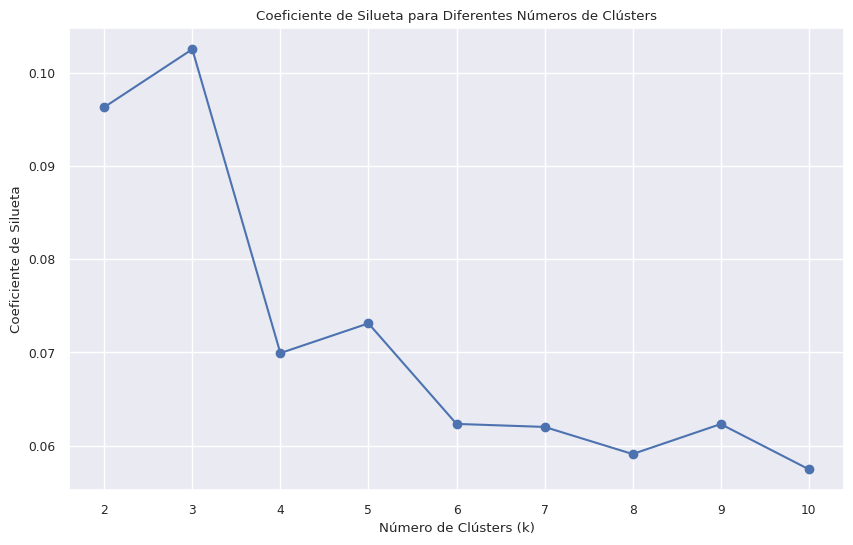

In [819]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Escalado de las características numéricas
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data_encoded.drop(columns=['treatment']))

# Probar diferentes números de clústers y calcular la puntuación del coeficiente de silueta
silhouette_scores = []
k_values = range(2, 11)  # Probar de 2 a 10 clústers

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Inicializar el modelo K-means
    kmeans.fit(features_scaled)  # Ajustar el modelo a los datos escalados
    cluster_labels = kmeans.labels_  # Etiquetas de los clústers generados
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)  # Calcular el coeficiente de silueta
    silhouette_scores.append(silhouette_avg)  # Guardar el resultado

# Visualizar los resultados del coeficiente de silueta para elegir el número óptimo de clústers
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title("Coeficiente de Silueta para Diferentes Números de Clústers")
plt.xlabel("Número de Clústers (k)")
plt.ylabel("Coeficiente de Silueta")
plt.grid(True)
plt.show()


In [820]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Escalado de las características numéricas
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data_encoded.drop(columns=['treatment']))

# Aplicar K-Means clustering con un número fijo de clusters (3)
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_model.fit_predict(features_scaled)

# Agregar etiquetas de cluster a los datos
data_encoded['Clúster'] = cluster_labels
data_encoded.head()

# Contar el número de elementos en cada cluster
cluster_counts = data_encoded['Clúster'].value_counts()

# Mostrar los resultados
print(cluster_counts)


Clúster
1    706
2    401
0    139
Name: count, dtype: int64


In [821]:
# Resumen de los clusters
cluster_summary = data_encoded.groupby('Clúster').mean()

# Mostrar el resumen de los clusters
print(cluster_summary)

             Age  Gender  self_employed  family_history  treatment  \
Clúster                                                              
0       33.51079 0.85612        1.00000         0.39568    0.52518   
1       30.98867 0.82861        0.00142         0.32720    0.40085   
2       33.41147 0.78304        0.00249         0.49875    0.68080   

         work_interfere  no_employees  remote_work  tech_company  benefits  \
Clúster                                                                      
0               2.07194       1.12230      0.71223       0.90647   0.92086   
1               2.11615       2.87394      0.26346       0.84136   0.68555   
2               2.17955       3.22693      0.21197       0.75312   1.74314   

         care_options  wellness_program  seek_help  anonymity   leave  \
Clúster                                                                 
0             1.03597           1.02158    0.97122    0.89928 2.12230   
1             0.52833           0.84561

### Interpretación de clusters

La tabla muestra los valores promedios de las variables para cada clúster después de aplicar el algoritmo K-means. Esta segmentación nos permite identificar patrones y características distintivas en cada grupo de empleados.

A continuación, se presenta una interpretación detallada de los clústers,  diferencias clave entre los tres clústers (o grupos) y las posibles implicaciones para el bienestar de los empleados y la cultura organizacional.

---

**Clúster 0**

**Menor respaldo organizacional y bajo impacto laboral**

- **Demografía y entorno laboral:**
  - Edad promedio: 30.9 años, el grupo más joven.
  - Trabajo remoto: 25% (bajo), lo que indica que la mayoría trabaja presencialmente.
  - Empresas tecnológicas: 84%, una proporción alta pero menor que en otros clústers.
  - Empleados en la empresa: Valor promedio de 2.89, posiblemente pequeñas o medianas empresas.

- **Salud mental:**
  - Historial familiar de problemas de salud mental: 33%.
  - Interferencia laboral: 2.11, moderada.
  - Consecuencias percibidas por salud mental: Más bajas en comparación con otros clústers (0.83 mental, 0.80 física).
  
- **Apoyo organizacional:**
  - Beneficios y opciones de cuidado: Los más bajos (0.67 y 0.52).
  - Acceso a programas de bienestar: 0.85, el más bajo de todos los clústers.
  - Percepción de consecuencias negativas por buscar ayuda (0.10), indicando que este grupo siente menos estigma.

---


**Clúster 1**

**Mayor respaldo organizacional y alta percepción de consecuencias negativas**

- **Demografía y entorno laboral:**
  - Edad promedio: 33.54 años.
  - Trabajo remoto: Solo el 23% de los empleados trabaja de forma remota.
  - Empresas tecnológicas: 76%, la proporción más baja.
  - Empleados en la empresa: 3.20, empresas algo más grandes.

- **Salud mental:**
  - Historial familiar: 49%, el más alto, indicando una mayor predisposición.
  - Interferencia laboral: 2.19, el más alto, lo que sugiere que los problemas de salud mental afectan más su trabajo.

- **Apoyo organizacional:**
  - Beneficios: 1.73, el más alto de todos los clústers.
  - Opciones de cuidado: 1.65, también el mayor.
  - Programas de bienestar: 1.34, mostrando el mayor acceso.
  - Percepción de consecuencias negativas: Alto (0.20), lo que podría desalentar a los empleados a buscar ayuda.

---

**Clúster 2**

** Trabajo remoto, alta autonomía y apoyo intermedio**
- **Demografía y entorno laboral:**
  - Edad promedio: 33.58 años.
  - Trabajo remoto: 71%, lo que lo distingue de los otros clústers.
  - Empresas tecnológicas: 91%, la proporción más alta.
  - Empleados en la empresa: 1.09, empresas pequeñas.

- **Salud mental:**
  - Historial familiar: 40%, intermedio entre los otros grupos.
  - Interferencia laboral: 2.06, la más baja, posiblemente debido al alto porcentaje de trabajo remoto.
  
- **Apoyo organizacional:**
  - Beneficios y opciones de cuidado: Intermedios (0.92 y 1.05).
  - Programas de bienestar: 1.03, mejor que el clúster 0 pero menor que el clúster 1.
  - Percepción de consecuencias negativas: La más alta (0.22), indicando mayor temor al estigma.

---


#### **Conclusión y recomendaciones**
1. **Clúster 0 (Bajo respaldo organizacional):**
   - **Intervención:** Incrementar los programas de bienestar y las opciones de cuidado para mejorar el apoyo organizacional.
   - **Fortalezas:** Percepción baja de consecuencias negativas y bajo impacto laboral.

2. **Clúster 1 (Mayor respaldo, pero percepción de estigma):**
   - **Intervención:** Reducir el estigma asociado con los problemas de salud mental, fomentar espacios seguros para discutirlos.
   - **Fortalezas:** Acceso robusto a beneficios y opciones de cuidado.

3. **Clúster 2 (Trabajo remoto y alta percepción de estigma):**
   - **Intervención:** Diseñar programas específicos para empleados remotos, fomentando la conexión organizacional y reduciendo el estigma.
   - **Fortalezas:** Menor interferencia laboral gracias al trabajo remoto.

Estos hallazgos permiten diseñar estrategias específicas para cada grupo, mejorando la salud mental y el bienestar en el entorno laboral.

### <font color='#FFD700'>Métricas</font>

<font color='#FFD700'>Coeficiente de Silueta</font>

Mide cómo de bien se agrupan los puntos en sus clusters asignados y qué tan separados están de otros clusters. Un valor cercano a 1 indica clusters bien definidos.

In [822]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(features_scaled, cluster_labels)
print(f"Coeficiente de Silueta: {silhouette_avg}")

Coeficiente de Silueta: 0.10250250059547043


<font color='#FFD700'>Inercia</font>

Evalúa la relación entre la dispersión dentro de los clusters y la separación entre clusters. Un valor más bajo indica mejor calidad de los clusters.

In [823]:
# Obtener la inercia del modelo K-Means
kmeans_inertia = kmeans_model.inertia_
print(f"Inercia: {kmeans_inertia}")

Inercia: 23644.073265361032


<font color='#FFD700'>Índice de Davies-Bouldin</font>

Evalúa la relación entre la dispersión dentro de los clusters y la separación entre clusters. Un valor más bajo indica mejor calidad de los clusters.

In [824]:
from sklearn.metrics import davies_bouldin_score

# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(features_scaled, cluster_labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Índice de Davies-Bouldin: 2.7384983261192697


<font color='#FFD700'>Calinski-Harabasz Index</font>

Mide la relación entre la dispersión dentro del cluster y la separación entre clusters. Un valor más alto indica clusters mejor definidos.

In [825]:
from sklearn.metrics import calinski_harabasz_score

# Calcular el índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(features_scaled, cluster_labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

Índice de Calinski-Harabasz: 99.04242975802475


<font color='#FFD700'>Homogeneidad, Completitud y V-Measure</font>

1. **Homogeneidad**: Mide si todos los puntos de un mismo cluster comparten la misma etiqueta verdadera. Valores cercanos a 1 indican alta homogeneidad.
2. **Completitud**: Evalúa si todos los puntos que tienen la misma etiqueta verdadera están agrupados en el mismo cluster. Valores cercanos a 1 indican alta completitud.
3. **V-Measure**: Es el promedio armónico entre la homogeneidad y la completitud, proporcionando un resumen general de la calidad del clustering.

Este código asume que la columna `treatment` contiene las etiquetas reales para calcular las métricas. Asegúrate de que `treatment` esté correctamente codificada antes de ejecutar estas métricas.

In [826]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Definir true_labels como las etiquetas verdaderas del dataset
true_labels = data_encoded['treatment']

# Calcular las métricas
homogeneity = homogeneity_score(true_labels, cluster_labels)
completeness = completeness_score(true_labels, cluster_labels)
v_measure = v_measure_score(true_labels, cluster_labels)

print(f"Homogeneidad: {homogeneity}")
print(f"Completitud: {completeness}")
print(f"V-Measure: {v_measure}")

Homogeneidad: 0.04737261887996917
Completitud: 0.03525160439169413
V-Measure: 0.04042303222057401


Los valores de homogeneidad, completitud y V-measure son métricas clave para evaluar el desempeño de un algoritmo de clustering como K-means. Aquí está la interpretación de los resultados:

---

**Homogeneidad**
- La homogeneidad mide qué tan bien los clústers contienen exclusivamente datos de una misma categoría.
- **Bajo valor (0.045)**: Indica que los clústers generados no son muy "puros", es decir, no agrupan perfectamente a individuos con características similares.

---

**Completitud**
- La completitud evalúa si todos los datos que pertenecen a una misma categoría están asignados al mismo clúster.
- **Bajo valor (0.033)**: Sugiere que algunos datos con características similares están dispersos entre diferentes clústers.

---

**V-Measure**
- La V-measure es el promedio armónico entre homogeneidad y completitud. Mide el equilibrio entre ambos aspectos.
- **Bajo valor (0.038)**: Indica que los clústers no son claramente definidos y que la segmentación no está capturando patrones significativos en los datos.

---

**Interpretación general**
Estos valores bajos indican que el modelo K-means tiene dificultades para encontrar clústers bien definidos en el conjunto de datos. Esto podría deberse a varias razones:
1. **Datos no inherentemente agrupables:** Es posible que las variables no formen patrones naturales que puedan segmentarse fácilmente.
2. **Elección del número de clústers:** Es posible que el número de clústers seleccionado no sea óptimo.
3. **Variables no representativas:** Algunas variables podrían no ser relevantes o estar introduciendo ruido en el modelo.

---

**Recomendaciones**
1. **Probar otros valores de \( k \):** Experimentar con diferentes números de clústers para verificar si mejora la V-measure.
2. **Explorar técnicas avanzadas:**
   - Usar algoritmos alternativos como DBSCAN, HDBSCAN o Gaussian Mixture Models, que pueden manejar mejor datos complejos.
3. **Reducir la dimensionalidad:**
   - Aplicar PCA o t-SNE para simplificar el espacio de variables y visualizar posibles patrones.
4. **Evaluar las variables:** Realizar un análisis para identificar qué variables son más relevantes para el clustering y excluir aquellas que no aporten información útil.

## <font color='#FFD700'>DBSCAN</font>

In [827]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Escalado de las características numéricas
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data_encoded.drop(columns=['treatment']))

# Aplicar DBSCAN
dbscan_model = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(features_scaled)

# Agregar etiquetas de cluster a los datos
data_encoded['Clúster'] = cluster_labels
data_encoded.head()

# Contar el número de elementos en cada cluster
cluster_counts = data_encoded['Clúster'].value_counts()

# Mostrar los resultados
print(cluster_counts)

Clúster
1    706
2    401
0    139
Name: count, dtype: int64


In [828]:
# Resumen por cluster
cluster_summary = data_encoded.groupby('Clúster').mean()

# Mostrar resultados
print(cluster_summary)

             Age  Gender  self_employed  family_history  treatment  \
Clúster                                                              
0       33.51079 0.85612        1.00000         0.39568    0.52518   
1       30.98867 0.82861        0.00142         0.32720    0.40085   
2       33.41147 0.78304        0.00249         0.49875    0.68080   

         work_interfere  no_employees  remote_work  tech_company  benefits  \
Clúster                                                                      
0               2.07194       1.12230      0.71223       0.90647   0.92086   
1               2.11615       2.87394      0.26346       0.84136   0.68555   
2               2.17955       3.22693      0.21197       0.75312   1.74314   

         care_options  wellness_program  seek_help  anonymity   leave  \
Clúster                                                                 
0             1.03597           1.02158    0.97122    0.89928 2.12230   
1             0.52833           0.84561